In [1]:
from PIL import ImageFilter, Image
import pytesseract
import IPython.display 
from  pdf2image import convert_from_path
from os import listdir
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
path = 'exploration_data/'
# TODO(leommiranda): test lower dpi values with the ocr algorithm
dpi = 450
first_page = 1
last_page = 2 # value None means that the last page will be the last
thread_count = 1
size = None

In [3]:
dir_images = []
# TODO(leommiranda): should I use cropbox instead of mediabox?
for pdf_path in listdir(path):
    try:
        # substituir por conversor de pdf para texto
        text = dadasd
    except:
        pdf_images = convert_from_path(pdf_path=path+pdf_path, 
                                       dpi=dpi, 
                                       first_page=first_page, 
                                       last_page=last_page, 
                                       thread_count=thread_count, 
                                       size=size)
        dir_images.append(pdf_images)

In [ ]:
"""
i = 0
for pdf_images in dir_images:
    for pdf_img in pdf_images:
        i += 1
        pdf_img = np.array(pdf_img.convert('RGB'))
        pdf_img = cv2.cvtColor(pdf_img, cv2.COLOR_RGB2GRAY)
        plt.figure(dpi=dpi)
        plt.title(pdf_path + str(i))
        plt.imshow(pdf_img)
"""

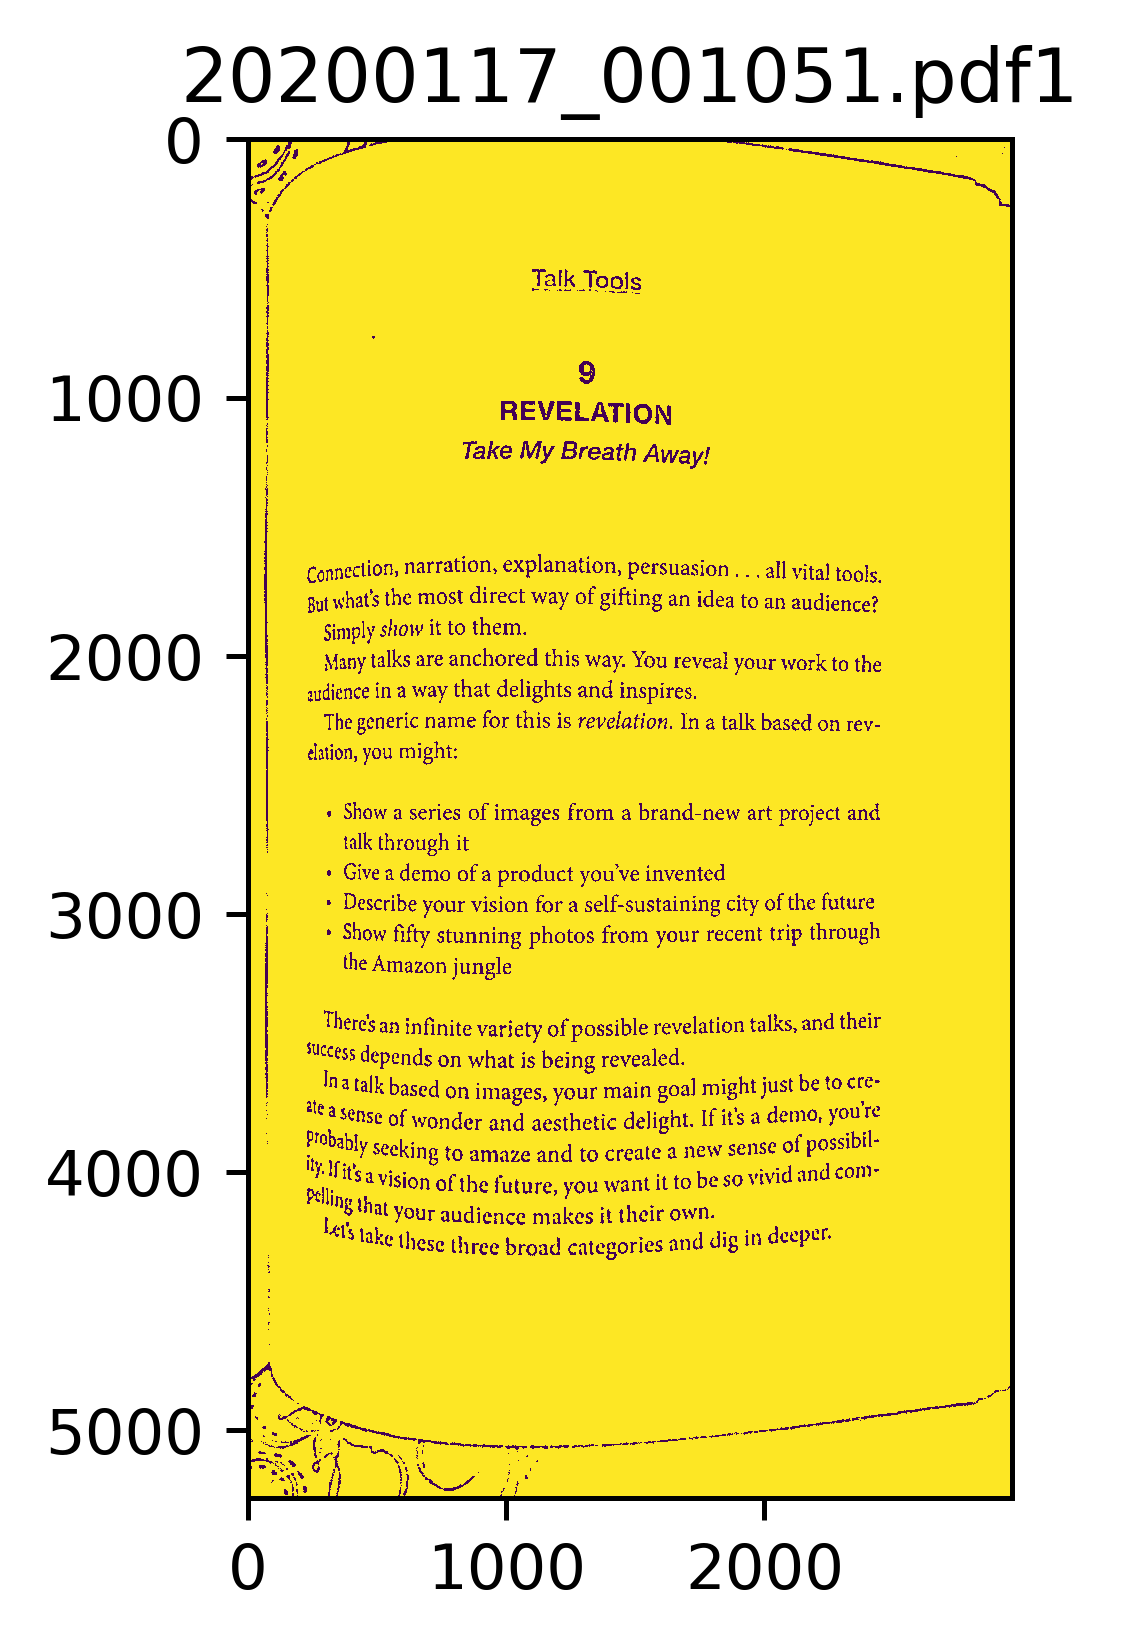

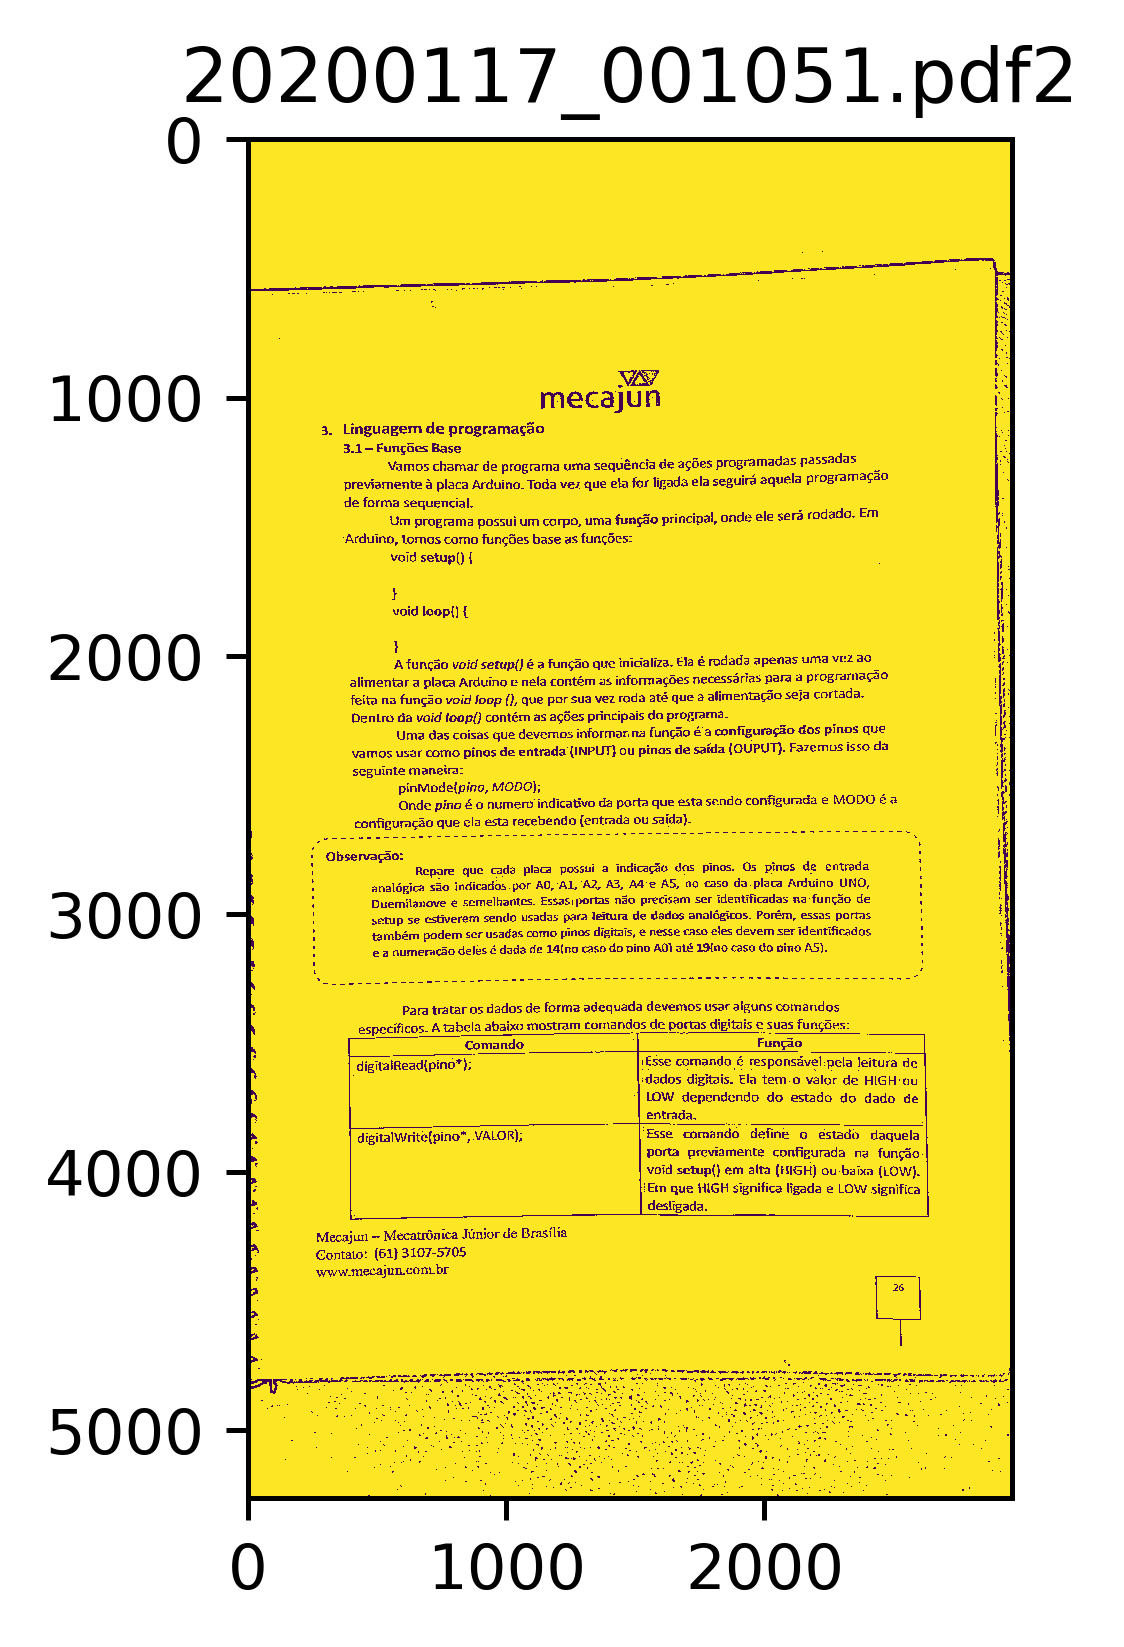

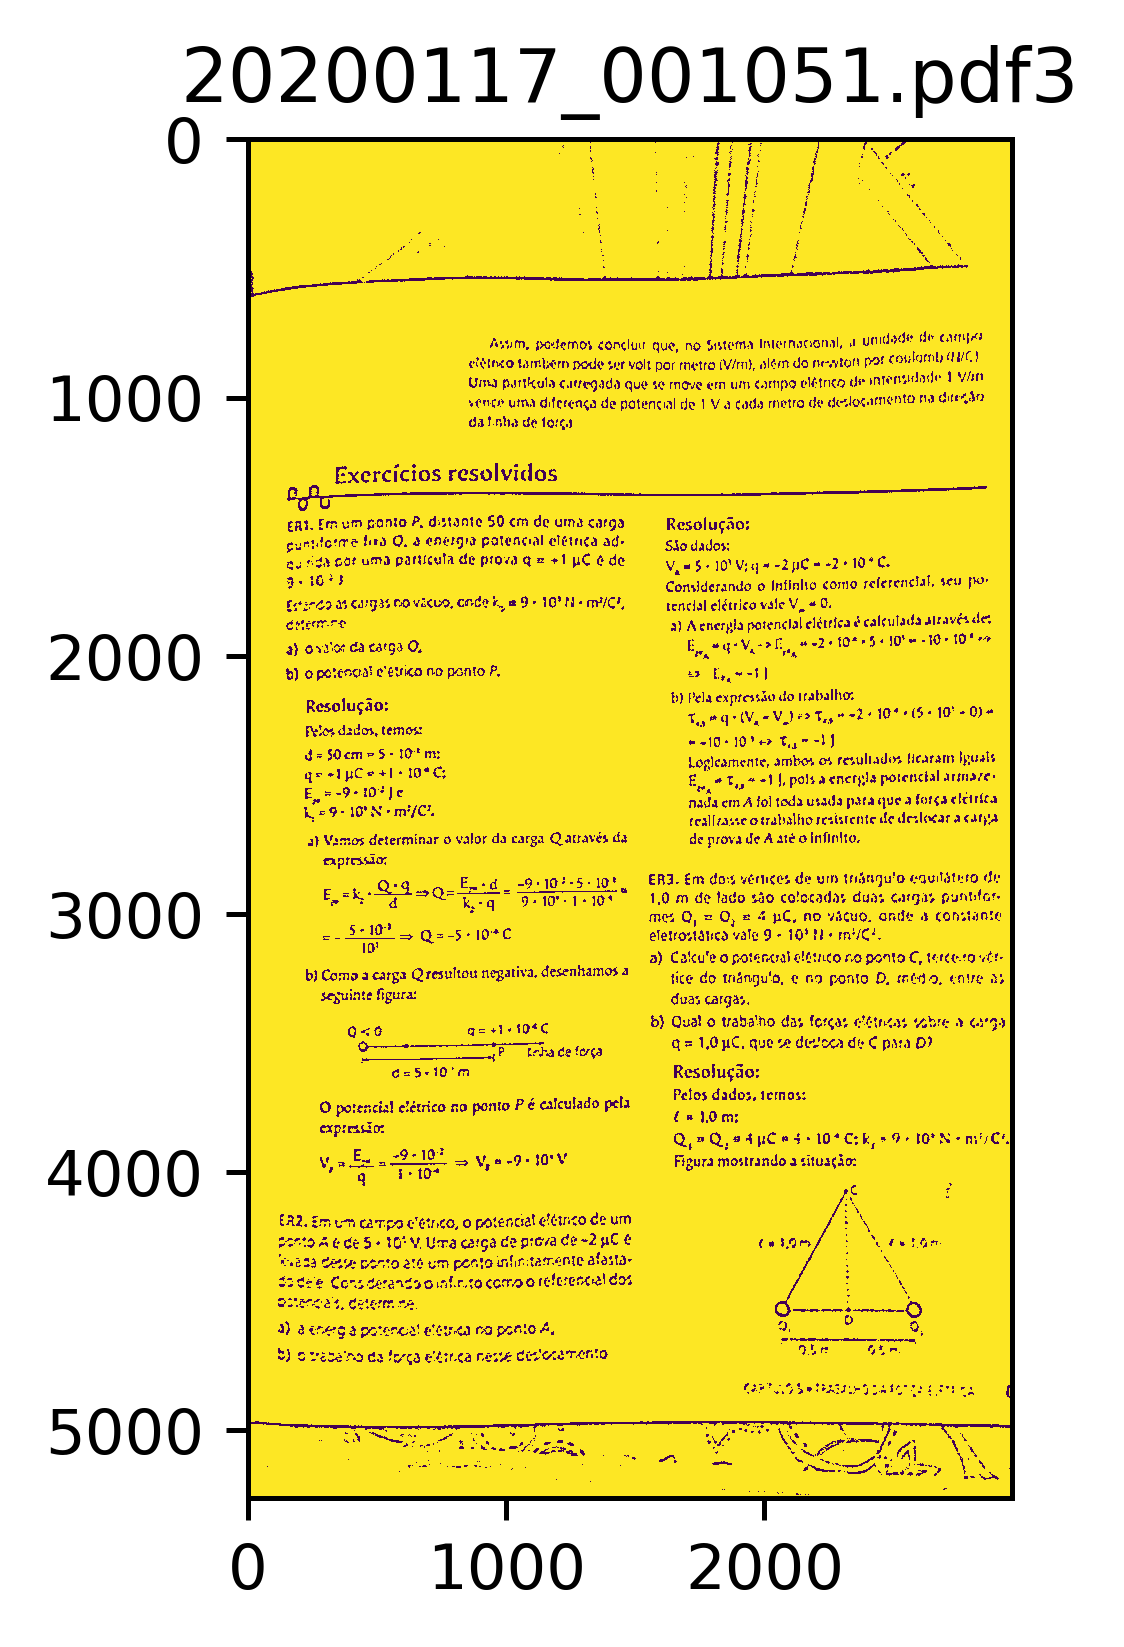

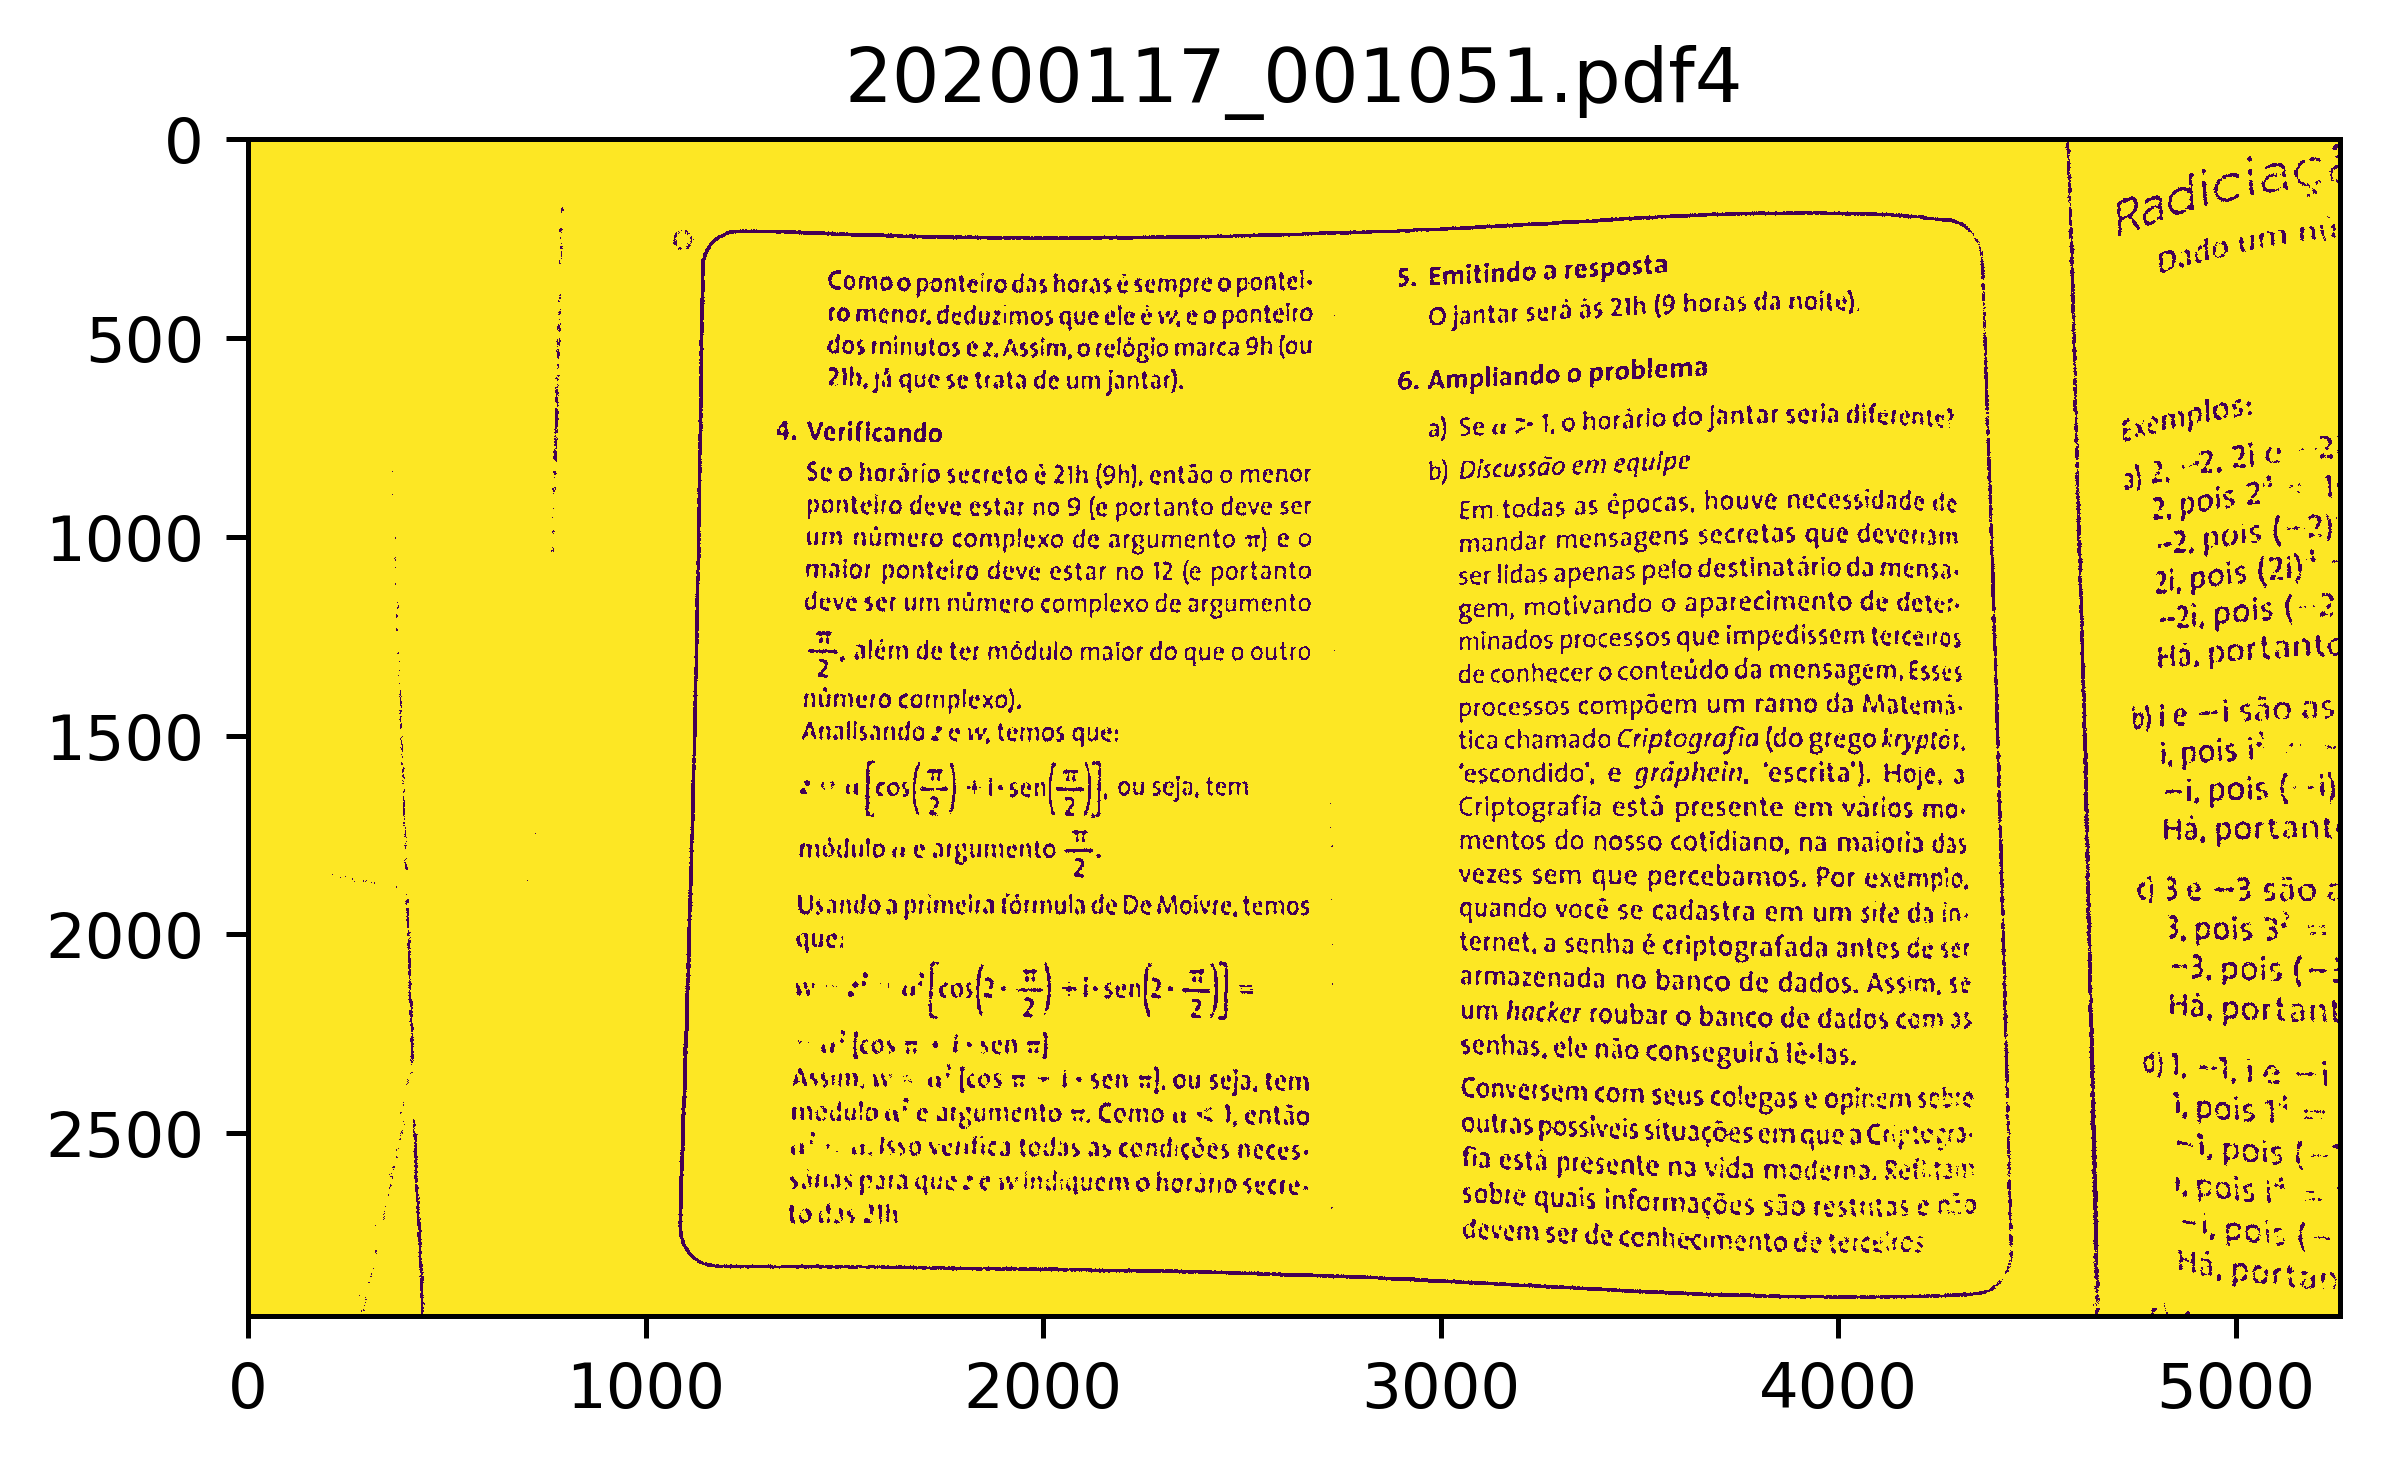

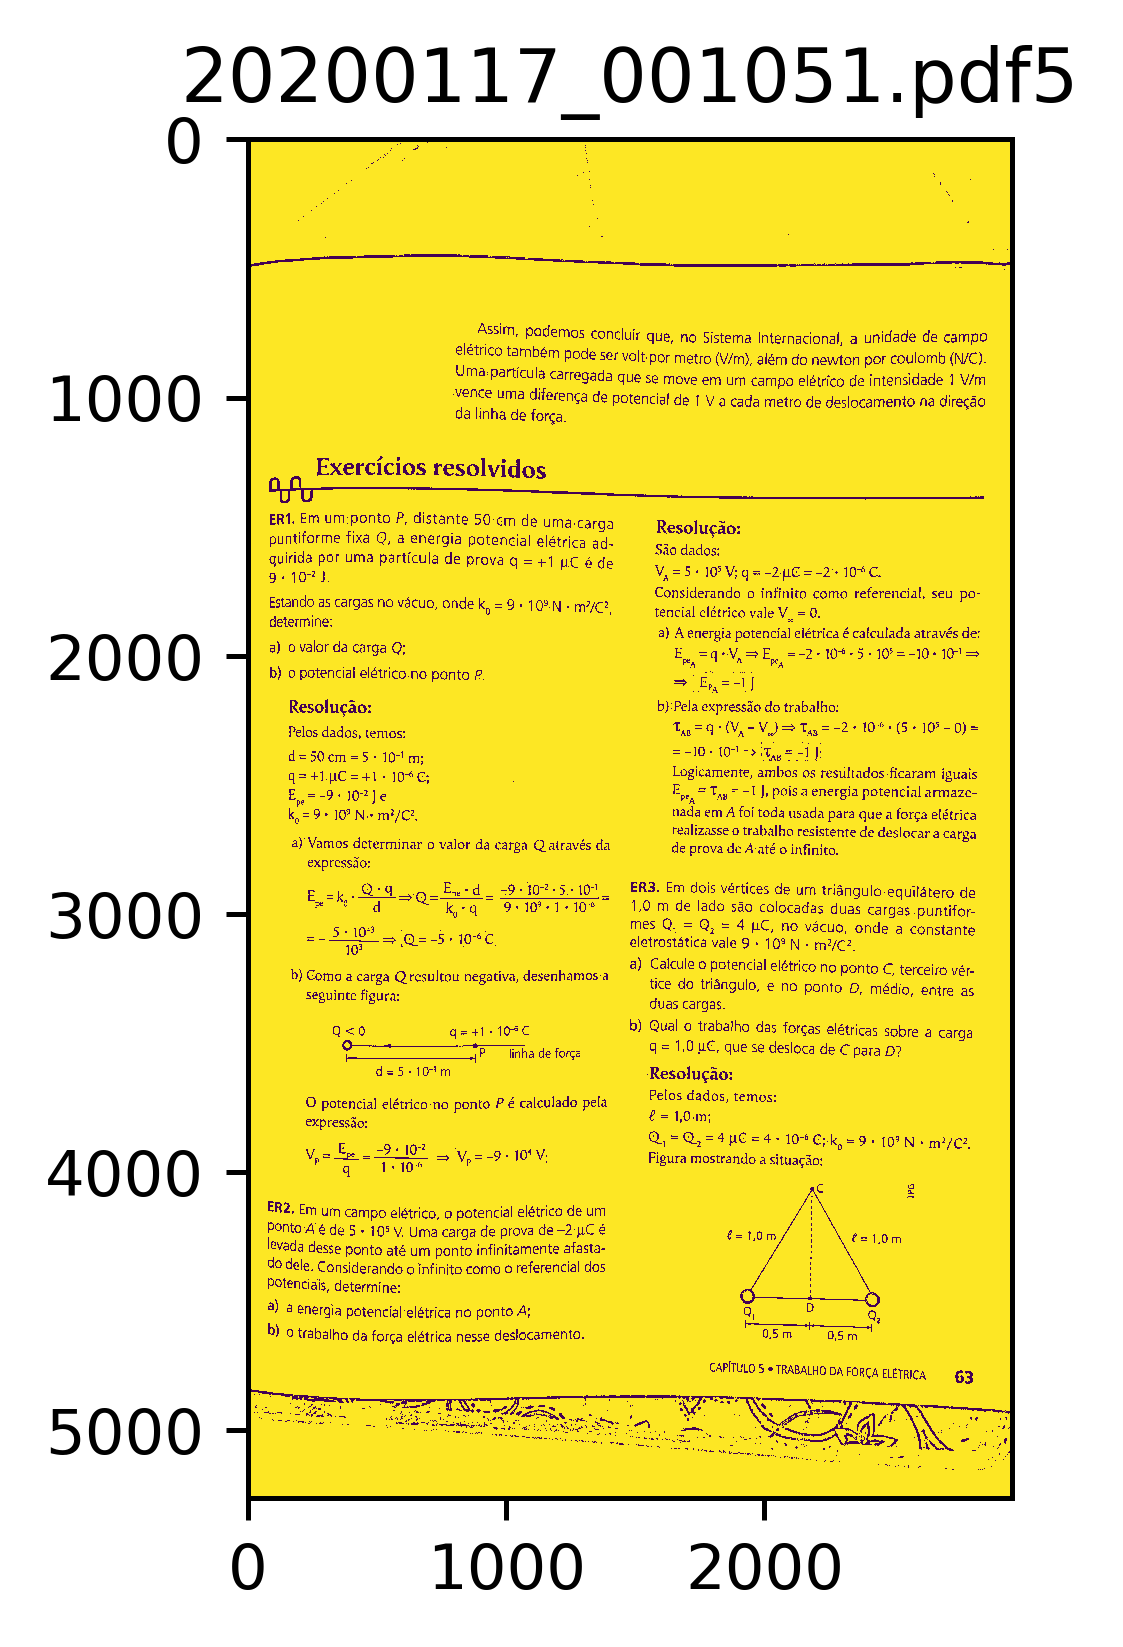

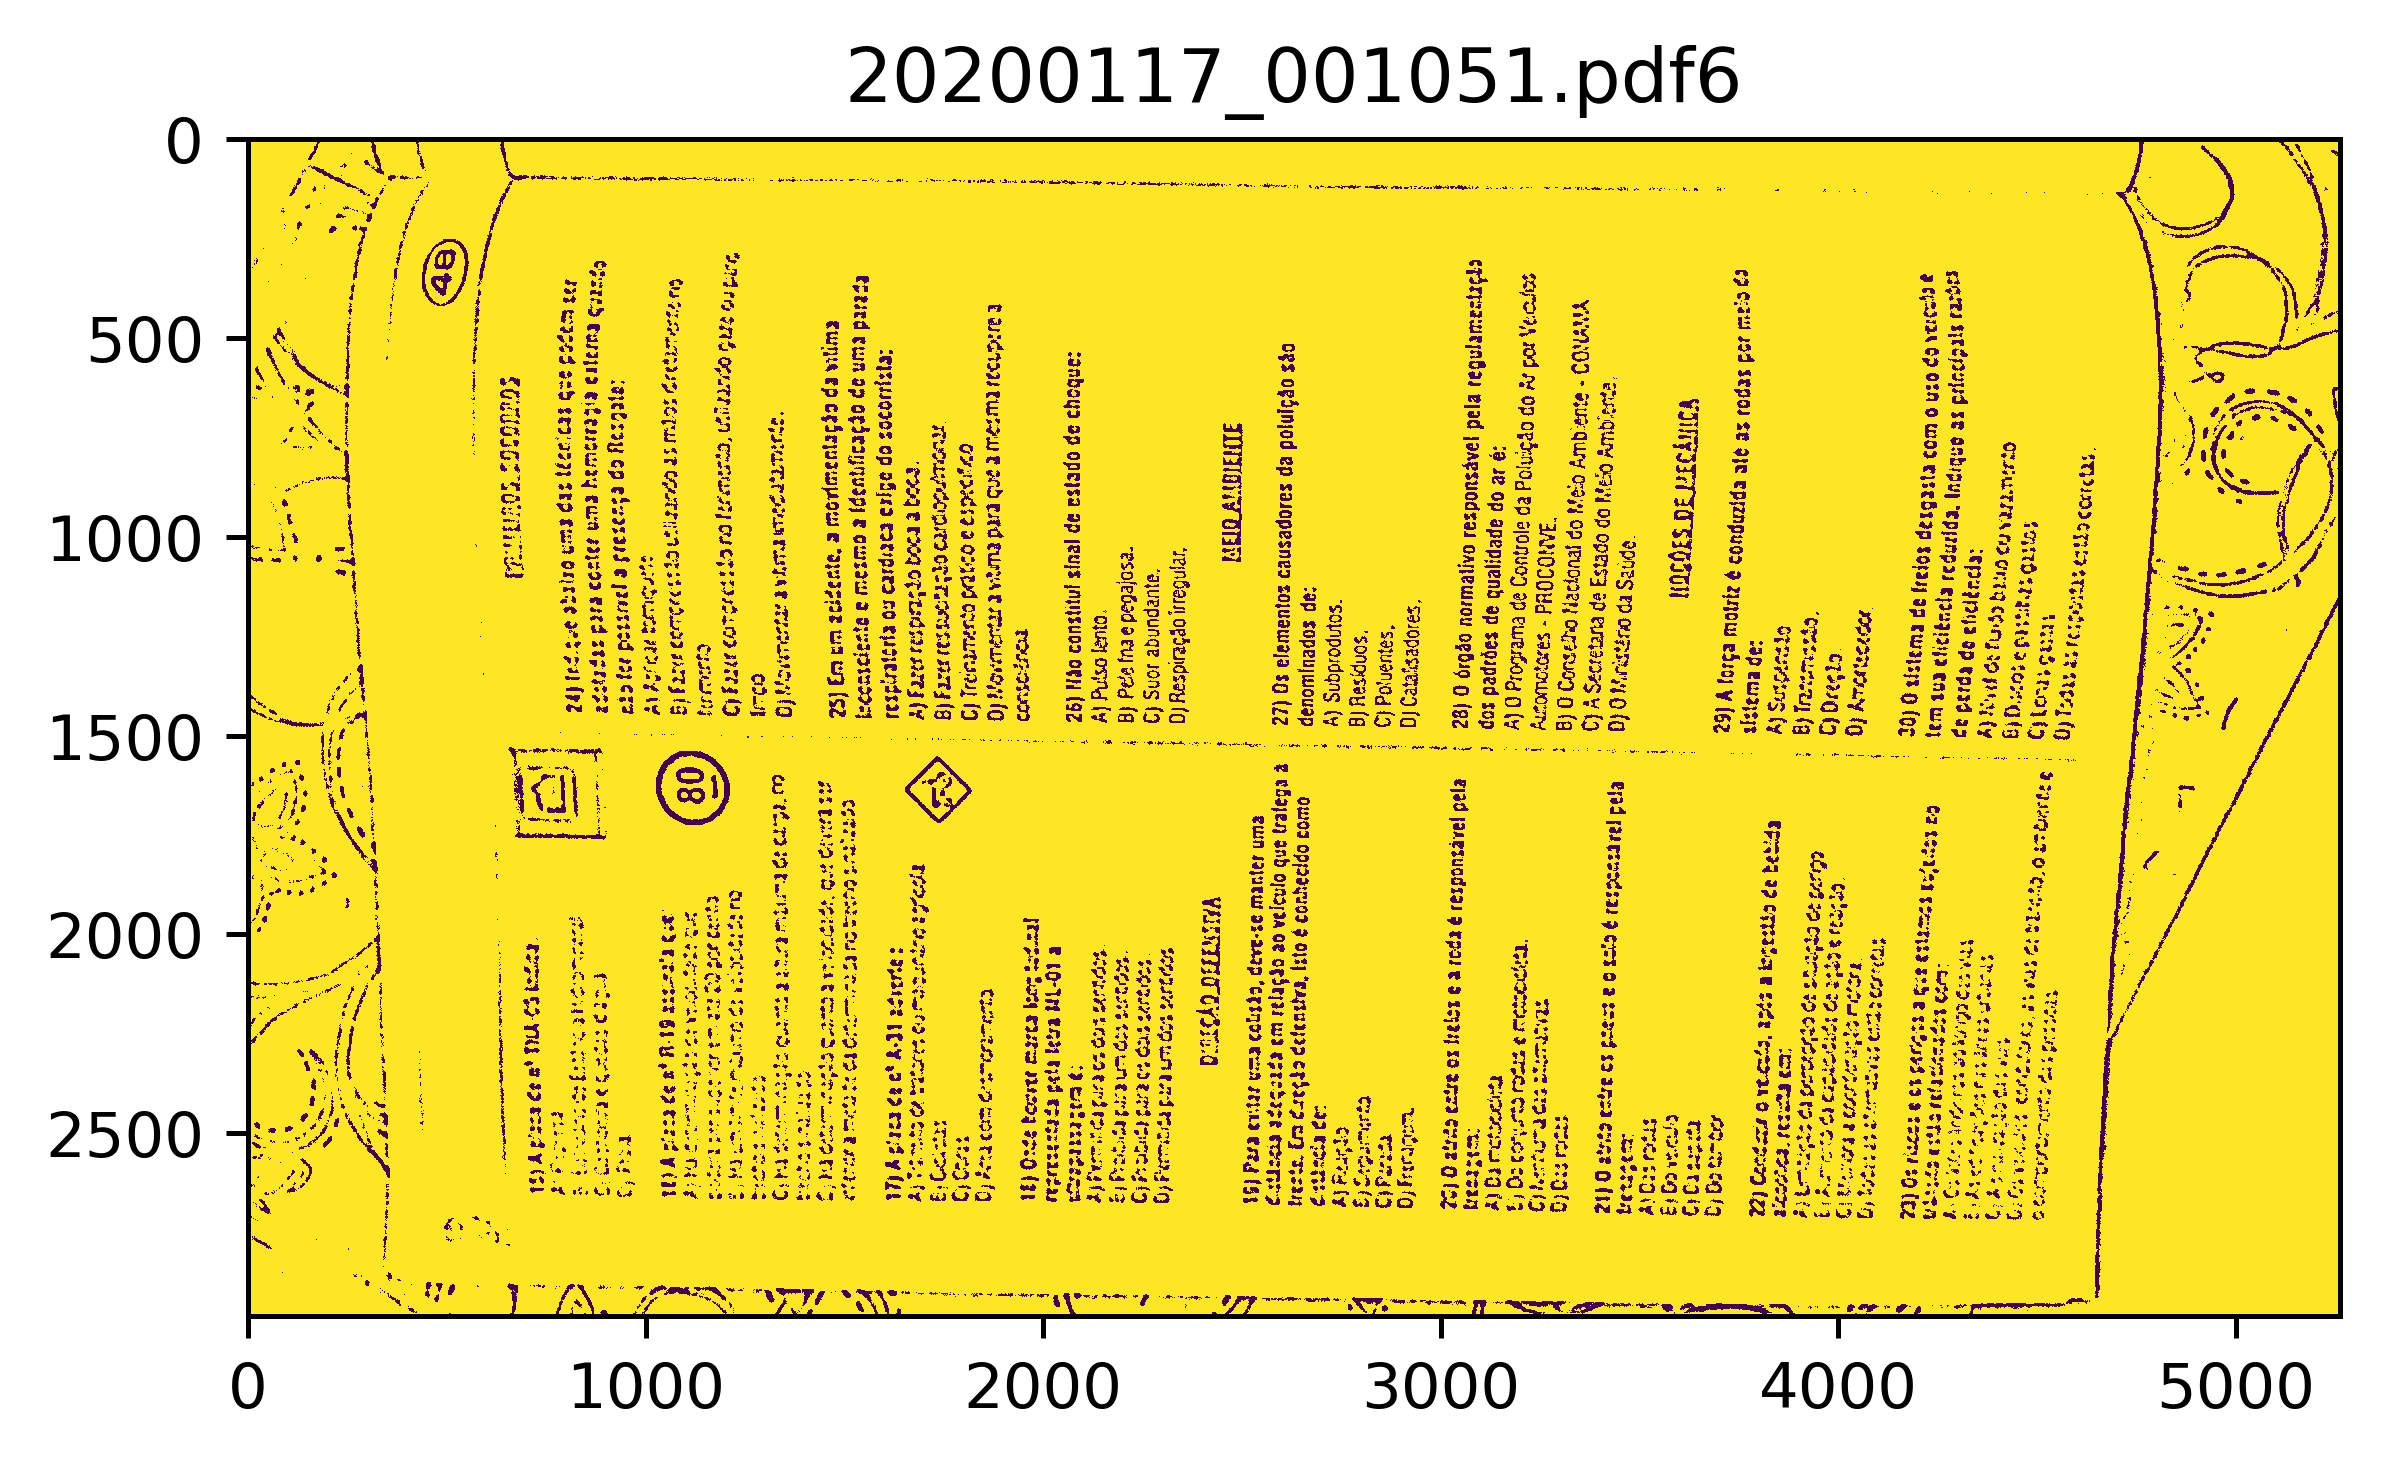

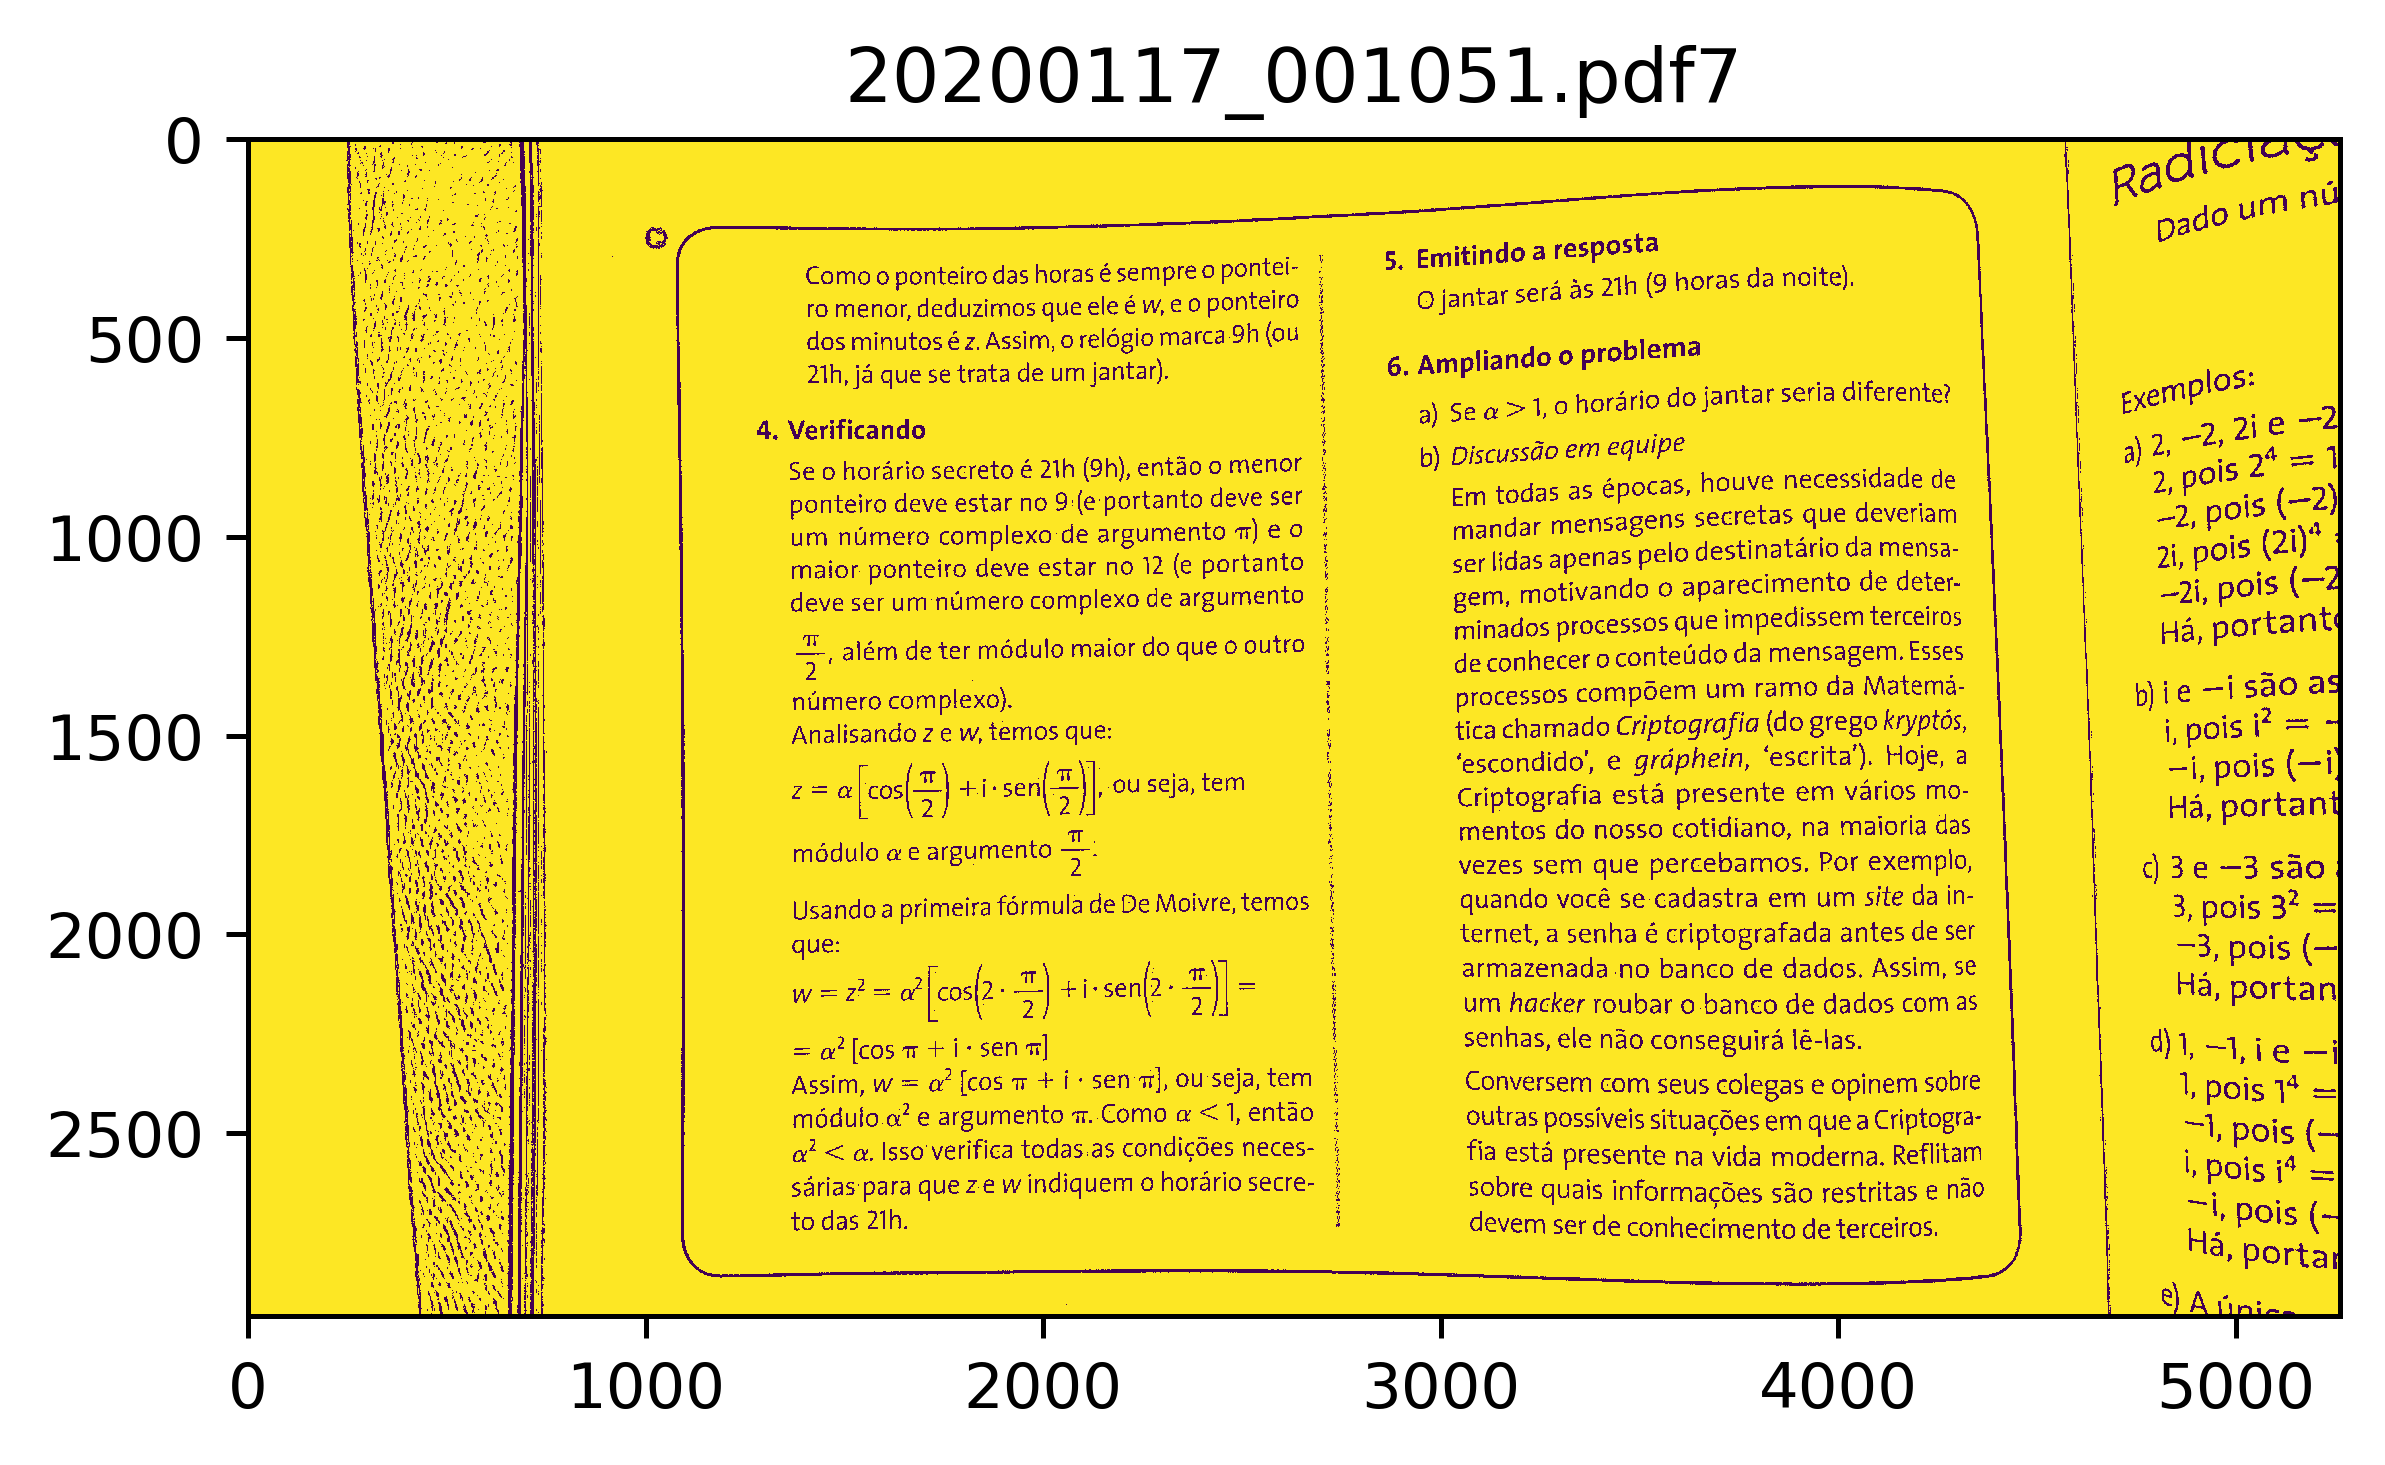

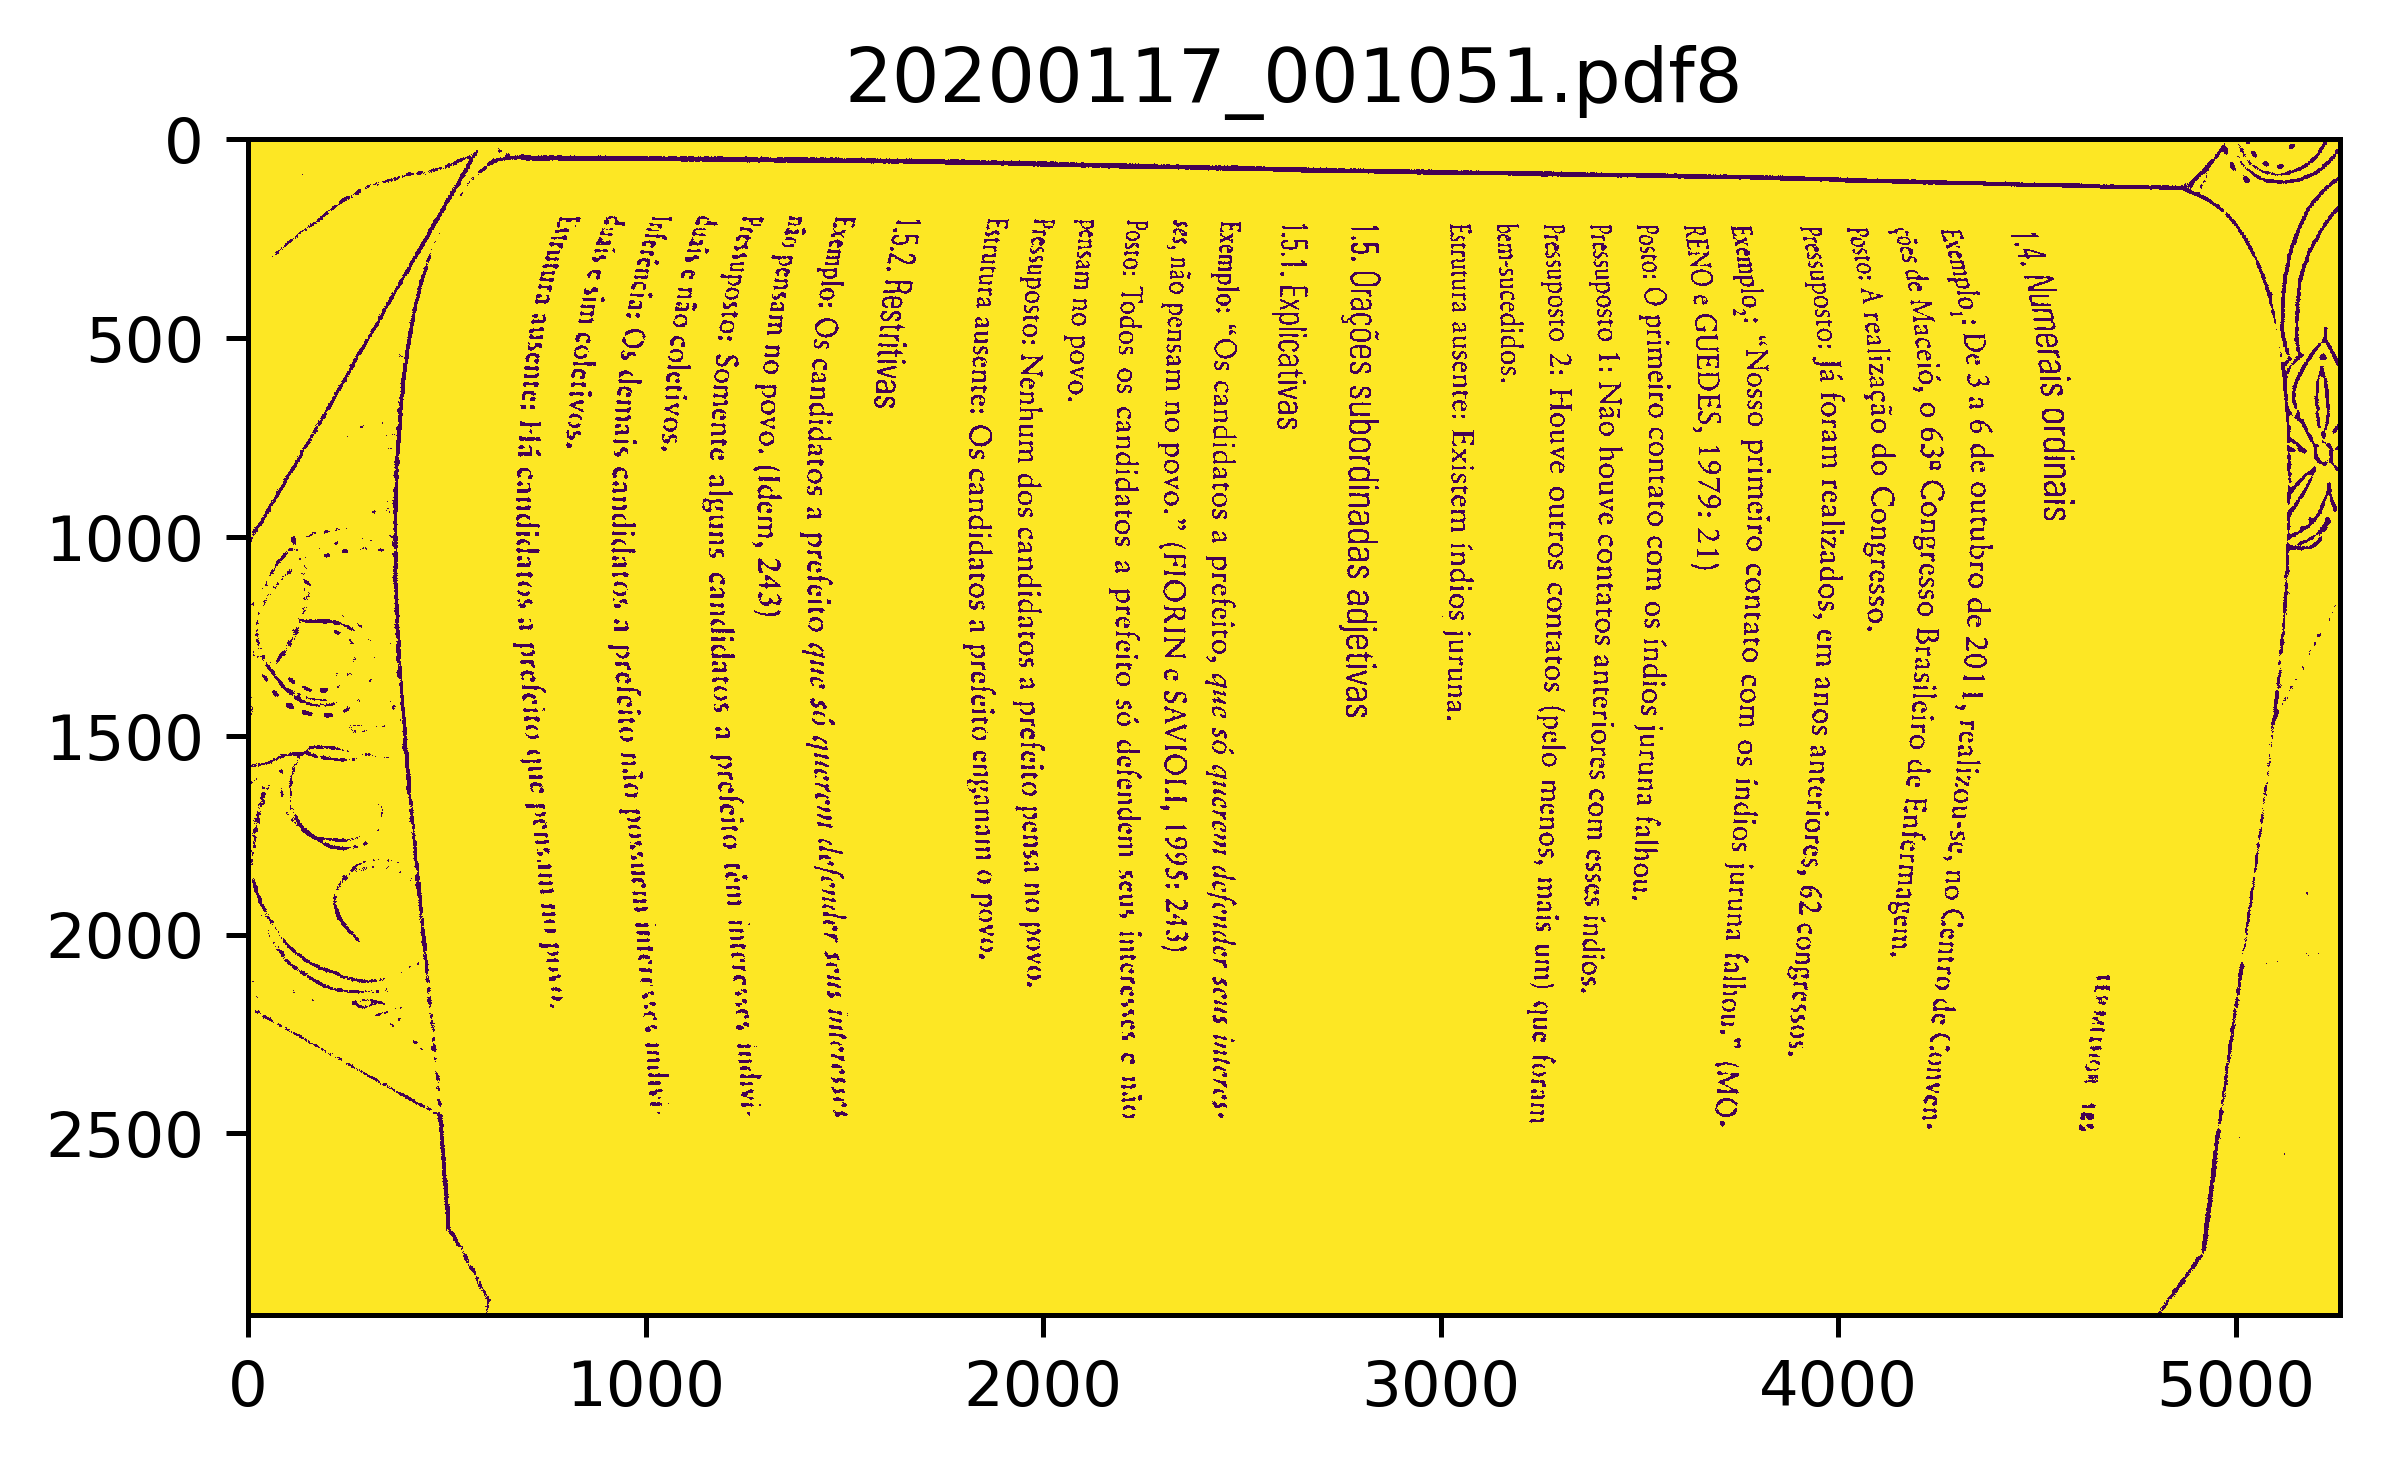

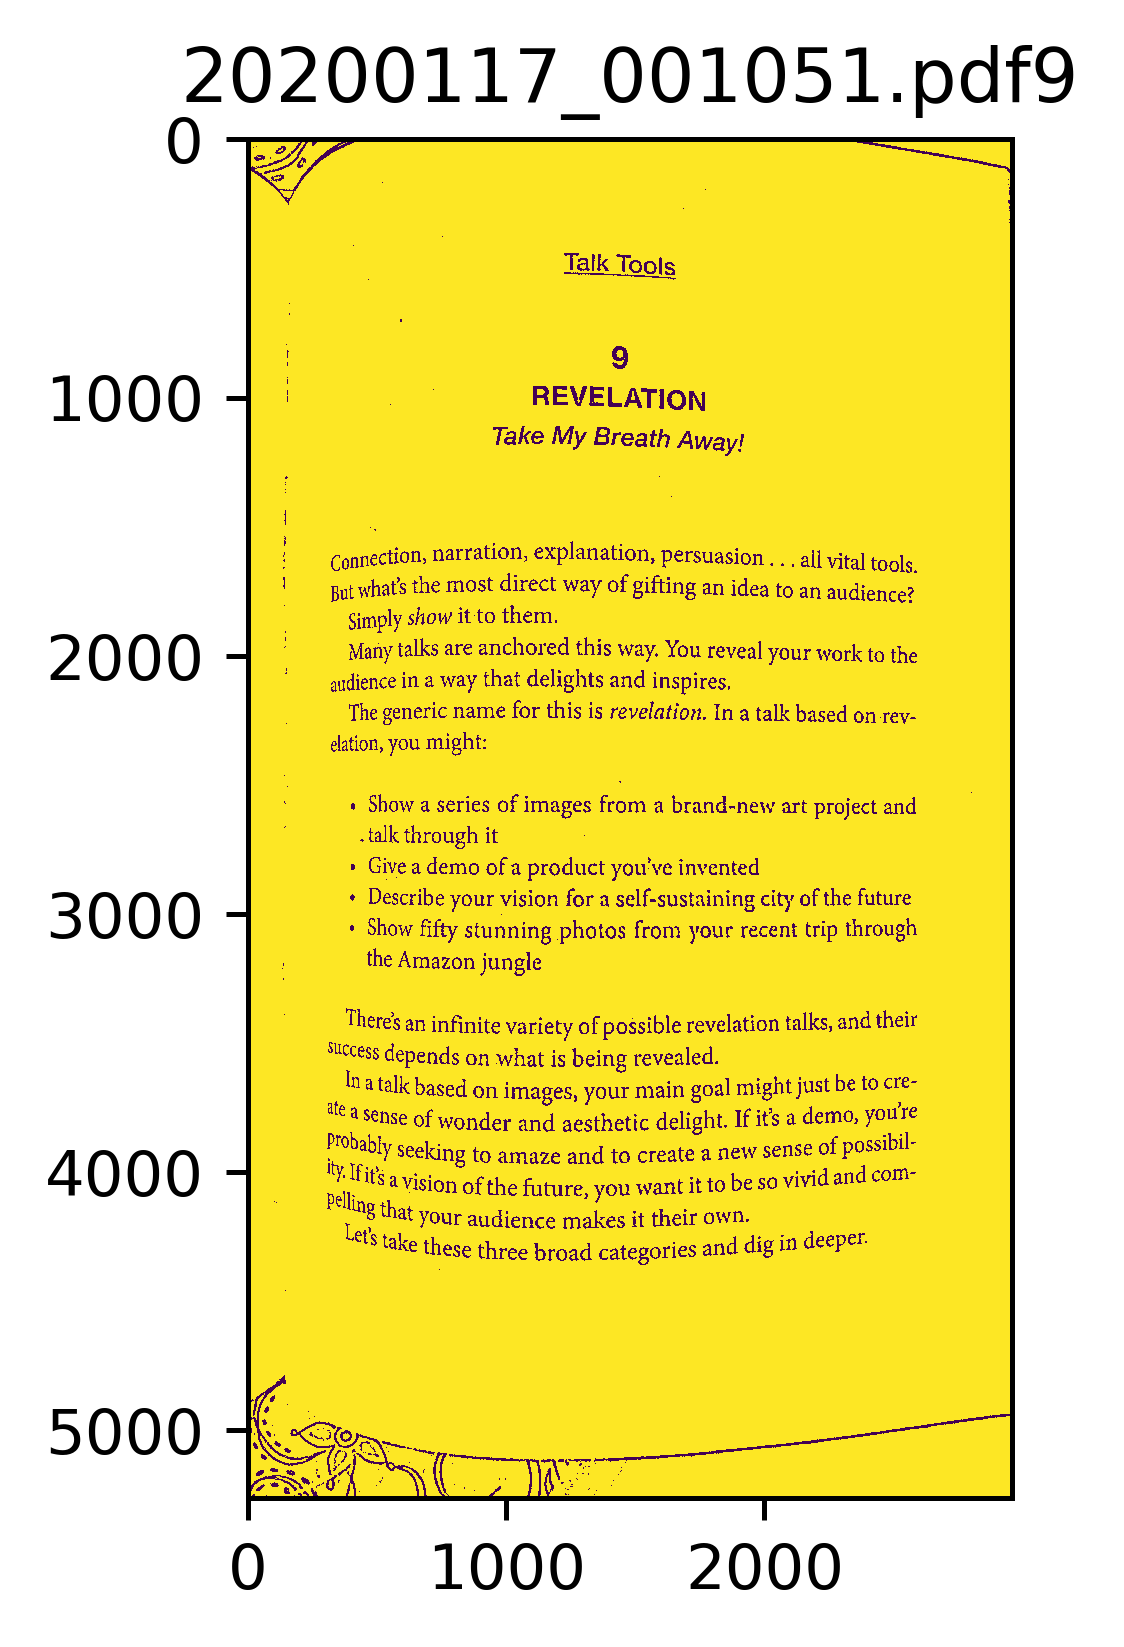

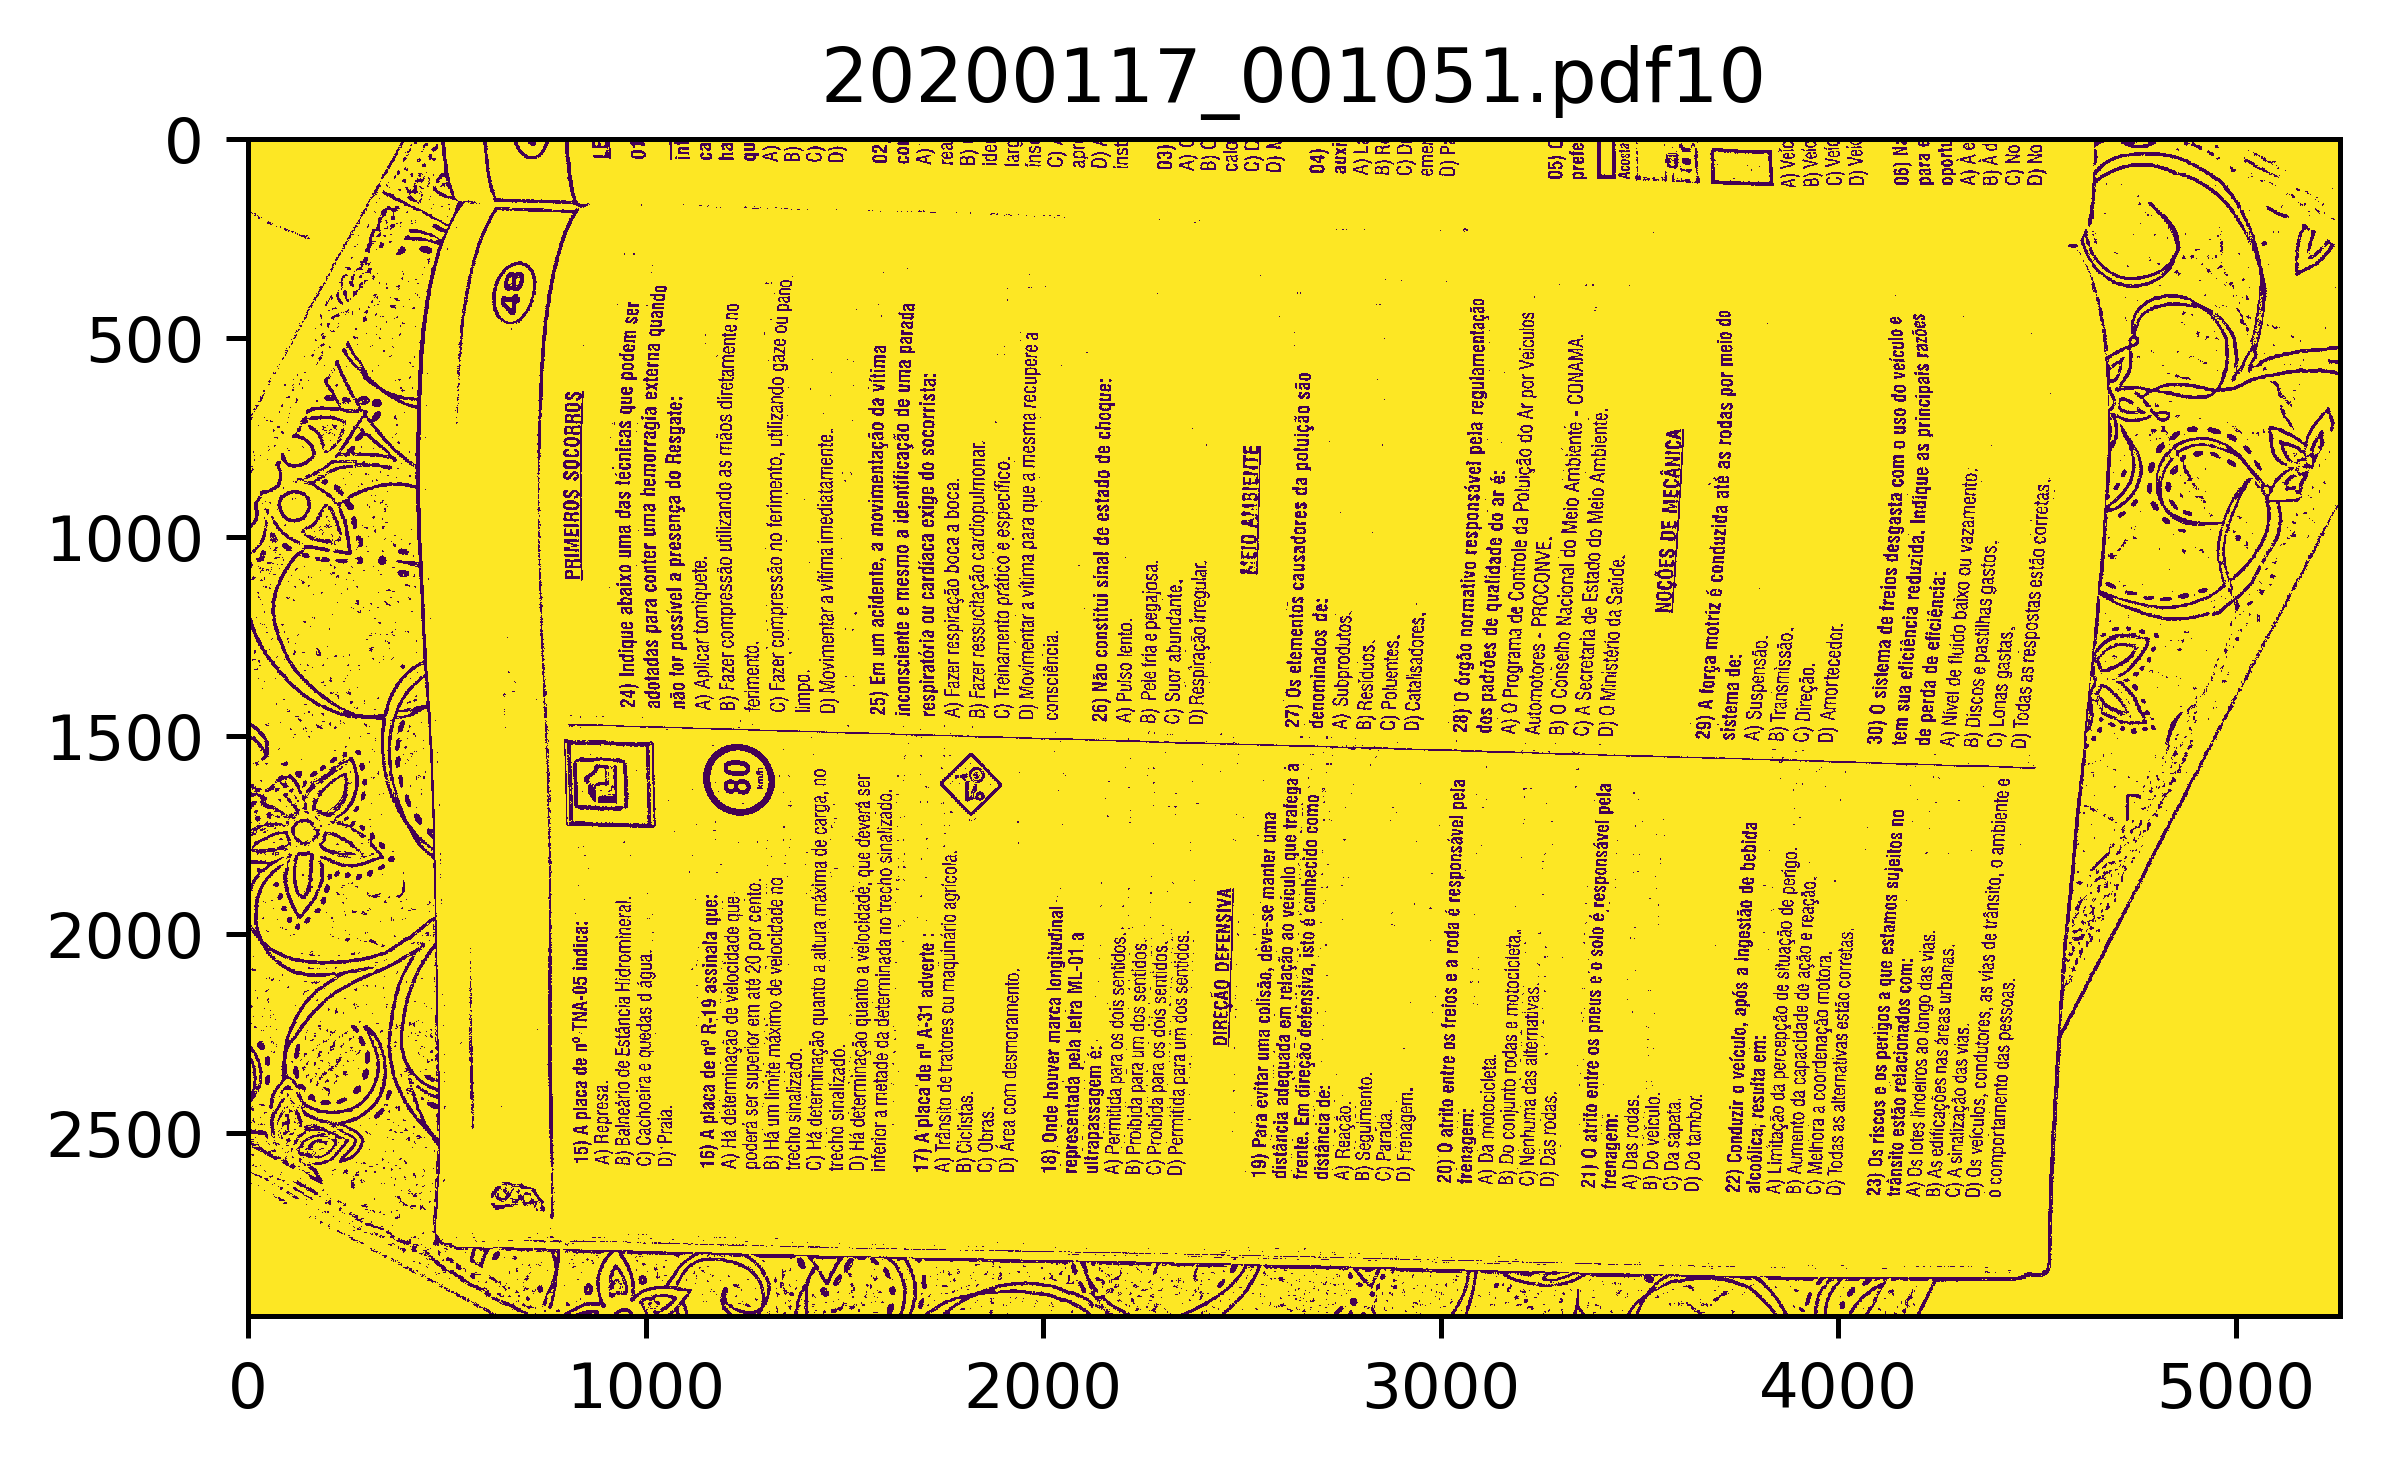

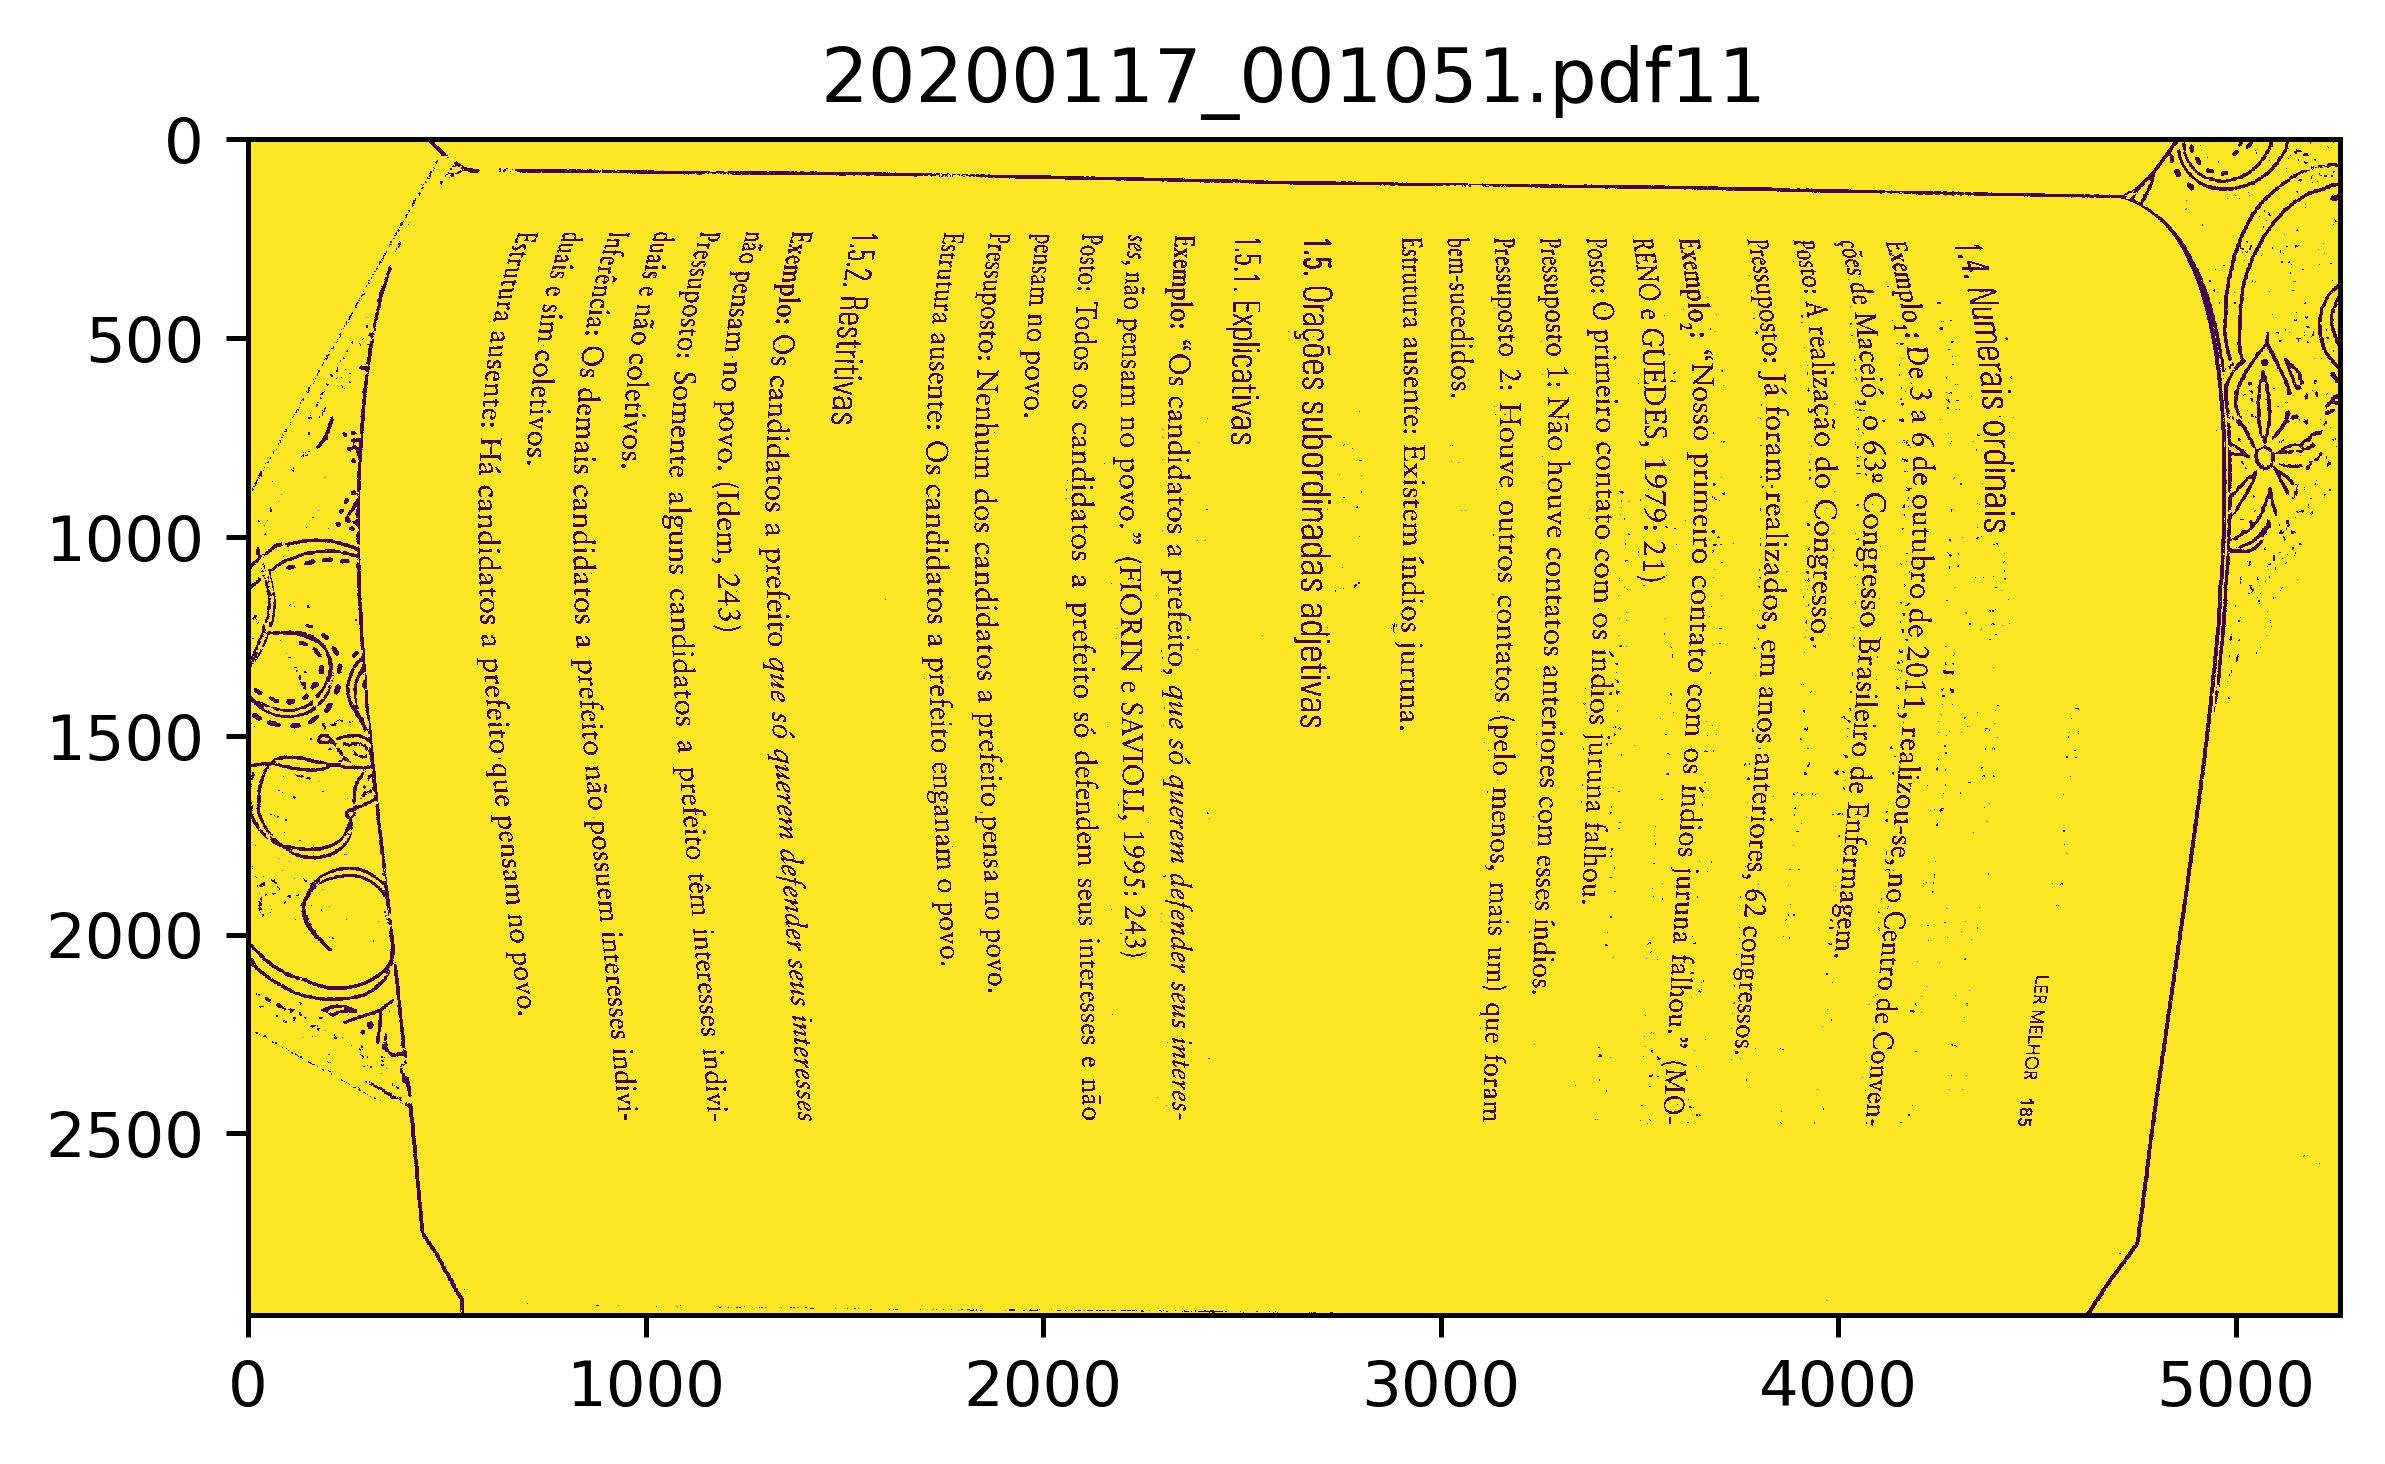

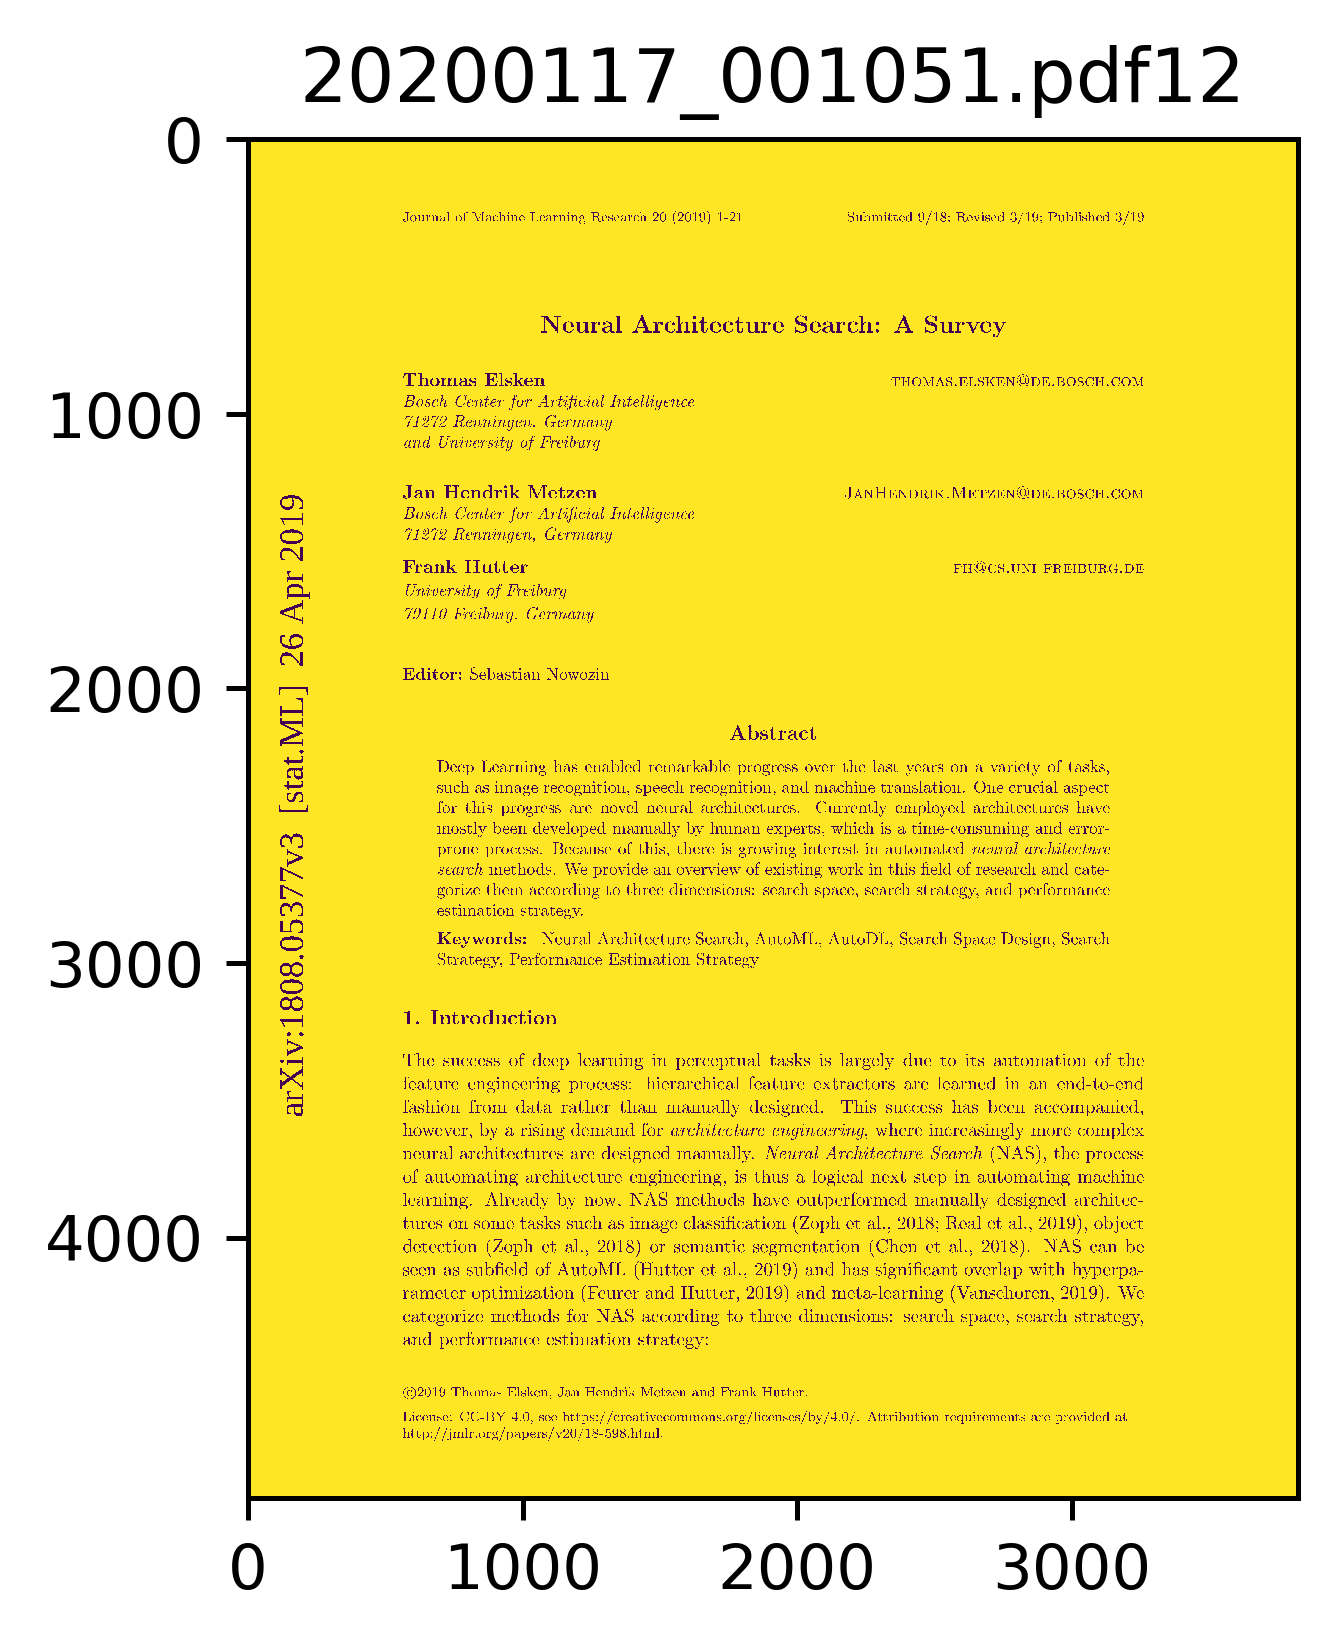

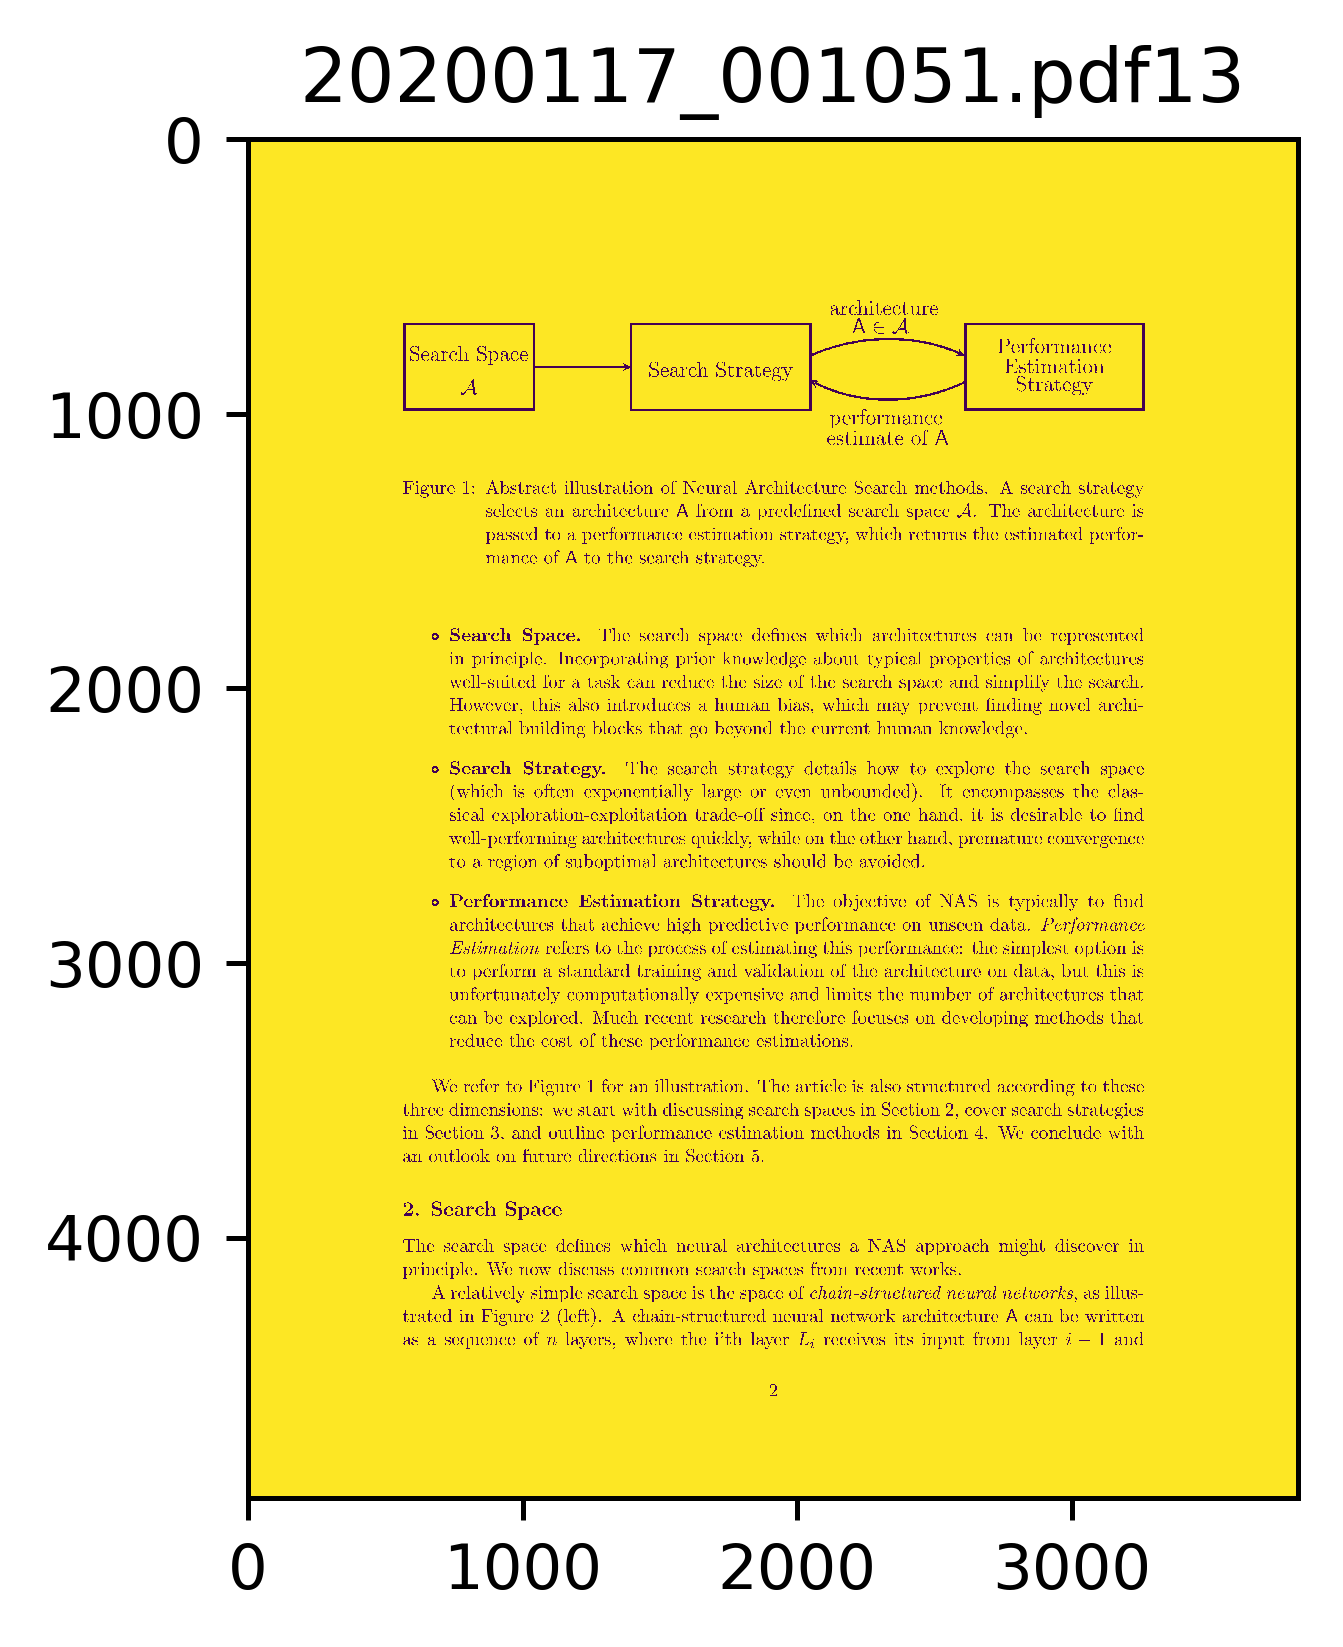

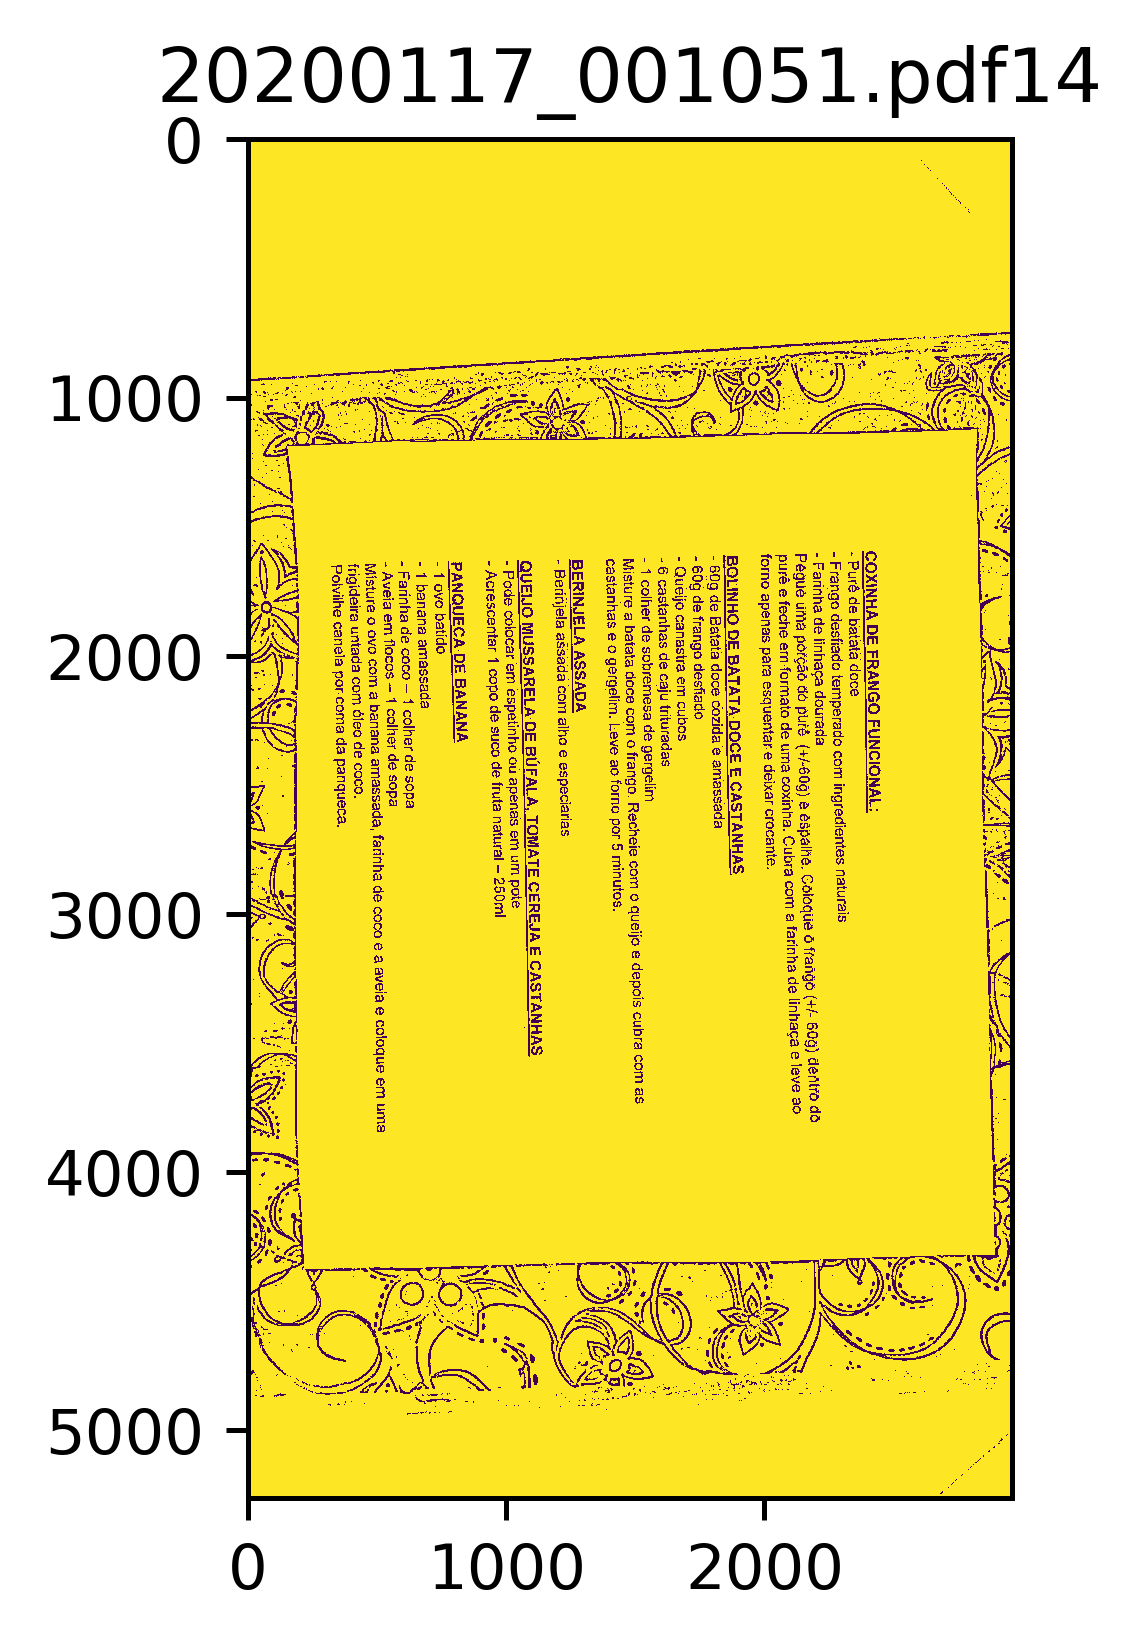

In [6]:
i = 0
for pdf_images in dir_images:
    for pdf_img in pdf_images:
        i += 1
        pdf_img = np.array(pdf_img.convert('RGB'))
        pdf_img = cv2.cvtColor(pdf_img, cv2.COLOR_RGB2GRAY)
        pdf_img = cv2.bilateralFilter(pdf_img, 17, 75, 75)
        pdf_img = cv2.adaptiveThreshold(pdf_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
        pdf_img = cv2.morphologyEx(pdf_img, cv2.MORPH_CLOSE, (21,21))
        plt.figure(dpi=dpi)
        plt.title(pdf_path + str(i))
        plt.imshow(pdf_img)

In [30]:
def x():
    i = 0
    for pdf_images in dir_images:
        for pdf_img in pdf_images:
            i += 1
            pdf_img = np.array(pdf_img.convert('RGB'))
            pdf_img = cv2.cvtColor(pdf_img, cv2.COLOR_RGB2GRAY)
            pdf_img = cv2.bilateralFilter(pdf_img, 17, 75, 75)
            pdf_img = cv2.adaptiveThreshold(pdf_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
            pdf_img = cv2.morphologyEx(pdf_img, cv2.MORPH_CLOSE, (21,21))
            if (i == 1 or i == 9 or i == 12 or i == 13):
                lang = 'eng'
            else:
                lang = 'por'
            pdf_text = pytesseract.image_to_string(Image.fromarray(pdf_img), lang=lang, config=('--ppm 12 --oem 2 --dpi ' + str(dpi)))
            #print("PATH " + str(i) + " | " + str(j) + " | \n" + pdf_text)

In [32]:
%timeit
x()